# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet(r'C:\Users\krisp\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\krisp\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_df = pd.read_parquet(file_path, engine="pyarrow")


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_df['tpep_pickup_datetime'].dt.date.unique():
            daily_df = monthly_df[monthly_df['tpep_pickup_datetime'].dt.date == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_df = daily_df[daily_df['tpep_pickup_datetime'].dt.hour == hour]
                
                # Sample 5% of the hourly data randomly 
                sampled_hourly_data = hourly_df.sample(frac=0.05, random_state=42) 
                # Concatenate the sampled data of all the dates to a single dataframe
                df = pd.concat([df, sampled_hourly_data], ignore_index=True)        
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
df.reset_index(drop=True, inplace=True)
df.to_parquet('sampled_yellow_taxi_data.parquet')

In [9]:
df.shape

(1896400, 20)

In [10]:
#To make sampling to inbetween 250,000 to 300,000

df['date'] = df['tpep_pickup_datetime'].dt.date
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by 'VendorID', 'date', and 'hour', then sample 15% of each group
sampled_data_for_analysis = df.groupby(['VendorID', 'date', 'hour'], group_keys=False).apply(
    lambda group: group.sample(frac=0.15, random_state=42) 
)

sampled_data_for_analysis = sampled_data_for_analysis.drop(columns=['hour', 'date'])
# Reset index for a clean DataFrame
sampled_data_for_analysis.reset_index(drop=True, inplace=True)

sampled_data_for_analysis.to_parquet('sampled_data_for_analysis.parquet')


In [11]:
sampled_data_for_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284471 entries, 0 to 284470
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284471 non-null  int64         
 1   tpep_pickup_datetime   284471 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284471 non-null  datetime64[us]
 3   passenger_count        274812 non-null  float64       
 4   trip_distance          284471 non-null  float64       
 5   RatecodeID             274812 non-null  float64       
 6   store_and_fwd_flag     274812 non-null  object        
 7   PULocationID           284471 non-null  int64         
 8   DOLocationID           284471 non-null  int64         
 9   payment_type           284471 non-null  int64         
 10  fare_amount            284471 non-null  float64       
 11  extra                  284471 non-null  float64       
 12  mta_tax                284471 non-null  floa

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [96]:
# Load the new data file
df = pd.read_parquet(r'C:\Users\krisp\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\sampled_data_for_analysis.parquet')

In [97]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:18:33   2023-01-01 00:54:44              1.0   
1         1  2023-01-01 00:26:16   2023-01-01 01:01:26              2.0   
2         1  2023-01-01 00:27:02   2023-01-01 00:34:16              1.0   
3         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
4         1  2023-01-01 00:27:51   2023-01-01 00:35:03              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           21.0         2.0                  N           132           238   
1            5.5         1.0                  N           246            41   
2            1.2         1.0                  N           263            75   
3            7.1         1.0                  N           246            37   
4            1.2         1.0                  N           236           236   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         70.0   3.75      0.5         0.0          6.55   
1             1         25.5   3.00      0.5         6.0          0.00   
2             1          7.9   3.50      0.5         2.6          0.00   
3             1         34.5   3.50      0.5         7.9          0.00   
4             1          9.3   3.50      0.5         2.0          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0          81.8                   2.5         1.25   
1                    1.0          36.0                   2.5         0.00   
2                    1.0          15.5                   2.5         0.00   
3                    1.0          47.4                   2.5         0.00   
4                    1.0          16.3                   2.5         0.00   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284471 entries, 0 to 284470
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284471 non-null  int64         
 1   tpep_pickup_datetime   284471 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284471 non-null  datetime64[us]
 3   passenger_count        274812 non-null  float64       
 4   trip_distance          284471 non-null  float64       
 5   RatecodeID             274812 non-null  float64       
 6   store_and_fwd_flag     274812 non-null  object        
 7   PULocationID           284471 non-null  int64         
 8   DOLocationID           284471 non-null  int64         
 9   payment_type           284471 non-null  int64         
 10  fare_amount            284471 non-null  float64       
 11  extra                  284471 non-null  float64       
 12  mta_tax                284471 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [99]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True)
df = df.drop(columns=['store_and_fwd_flag'])


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [100]:
# Combine the two airport fee columns
df['merged_airport_fee'] = df['airport_fee'].combine_first(df['Airport_fee'])
df = df.drop(columns=['airport_fee', 'Airport_fee'])


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [101]:
# check where values of fare amount are negative
fare_columns = ['fare_amount', 'mta_tax', 'tip_amount',  'tolls_amount',  'improvement_surcharge', 'total_amount', 'extra',  
                     'congestion_surcharge', 'merged_airport_fee']

rows_with_negatives = df[df[fare_columns].lt(0).any(axis=1)]
rows_with_negatives.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
84717          2  2023-01-17 15:03:44   2023-01-17 15:36:28              1.0   
89006          2  2023-01-25 11:10:37   2023-01-25 11:11:02              1.0   
105241         2  2023-02-23 11:23:07   2023-02-23 12:25:27              1.0   
110933         2  2023-03-05 00:50:17   2023-03-05 00:50:38              1.0   
114177         2  2023-03-10 16:18:09   2023-03-10 16:49:43              3.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
84717            4.12         1.0           239           168             2   
89006            0.02         2.0           170           233             2   
105241           4.48         1.0           226           226             2   
110933           0.00         2.0            70            70             2   
114177           6.94         1.0            88           230             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
84717           0.0    0.0     -0.5         0.0           0.0   
89006           0.0    0.0     -0.5         0.0           0.0   
105241          0.0    0.0     -0.5         0.0           0.0   
110933          0.0    0.0     -0.5         0.0           0.0   
114177          0.0    0.0     -0.5         0.0           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
84717                    -1.0          -4.0                  -2.5   
89006                    -1.0          -4.0                  -2.5   
105241                   -1.0          -1.5                   0.0   
110933                   -1.0          -1.5                   0.0   
114177                   -1.0          -4.0                  -2.5   

        merged_airport_fee  
84717                  0.0  
89006                  0.0  
105241                 0.0  
110933                 0.0  
114177                 0.0

Did you notice something different in the `RatecodeID` column for above records?

In [102]:
# Analyse RatecodeID for the negative fare amounts

rows_with_negatives["RatecodeID"].value_counts()
# RateCodeID = 2 which is JFK has trip distance is zero or near to zero, which looks like cancellations.keeping these values as it helps to see demand analysis as these very less.


RatecodeID
1.0    11
2.0     6
Name: count, dtype: int64

In [103]:
# fix these negative values
df[fare_columns] = df[fare_columns].abs()

print(f"After handling : negative values in data:\n{(df[fare_columns] < 0).sum()}")

After handling : negative values in data:
fare_amount              0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
extra                    0
congestion_surcharge     0
merged_airport_fee       0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [104]:
# Find the proportion of missing values in each column

null_values = df.isnull().sum() / len(df) 
print(f"Proportion of missing values:\n{null_values[null_values > 0] *100}")


Proportion of missing values:
passenger_count         3.395425
RatecodeID              3.395425
congestion_surcharge    3.395425
merged_airport_fee      3.395425
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [105]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df["passenger_count"].isnull()]


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
21             1  2023-01-01 02:51:58   2023-01-01 03:00:53              NaN   
72             1  2023-01-01 13:00:35   2023-01-01 13:04:58              NaN   
111            1  2023-01-01 17:30:33   2023-01-01 17:46:36              NaN   
163            1  2023-01-02 10:18:07   2023-01-02 10:28:26              NaN   
181            1  2023-01-02 12:06:39   2023-01-02 12:27:54              NaN   
...          ...                  ...                   ...              ...   
284437         2  2023-12-31 22:51:22   2023-12-31 23:05:29              NaN   
284446         2  2023-12-31 22:36:14   2023-12-31 23:07:55              NaN   
284452         2  2023-12-31 23:09:38   2023-12-31 23:13:32              NaN   
284455         2  2023-12-31 23:38:22   2024-01-01 00:02:48              NaN   
284459         2  2023-12-31 23:05:29   2023-12-31 23:09:42              NaN   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
21               2.10         NaN           162           236             0   
72               1.30         NaN           237           236             0   
111              2.50         NaN           107           141             0   
163              2.30         NaN           211           170             0   
181              0.00         NaN           166           140             0   
...               ...         ...           ...           ...           ...   
284437           3.26         NaN           141           170             0   
284446          14.18         NaN            71           203             0   
284452           0.60         NaN            74            42             0   
284455           8.38         NaN           244           137             0   
284459           1.44         NaN           141           263             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
21            11.40    1.0      0.5        1.64           0.0   
72             7.90    0.0      0.5        2.38           0.0   
111           17.00    0.0      0.5        4.20           0.0   
163           12.80    0.0      0.5        3.36           0.0   
181           20.25    0.0      0.5        0.00           0.0   
...             ...    ...      ...         ...           ...   
284437        21.55    0.0      0.5        0.00           0.0   
284446        49.31    0.0      0.5        0.00           0.0   
284452         6.83    0.0      0.5        0.00           0.0   
284455        34.93    0.0      0.5        0.00           0.0   
284459         8.74    0.0      0.5        0.00           0.0   

        improvement_surcharge  total_amount  congestion_surcharge  \
21                        1.0         18.04                   NaN   
72                        1.0         14.28                   NaN   
111                       1.0         25.20                   NaN   
163                       1.0         20.16                   NaN   
181                       1.0         24.25                   NaN   
...                       ...           ...                   ...   
284437                    1.0         25.55                   NaN   
284446                    1.0         50.81                   NaN   
284452                    1.0          8.33                   NaN   
284455                    1.0         38.93                   NaN   
284459                    1.0         12.74                   NaN   

        merged_airport_fee  
21                     NaN  
72                     NaN  
111                    NaN  
163                    NaN  
181                    NaN  
...                    ...  
284437                 NaN  
284446                 NaN  
284452                 NaN  
284455                 NaN  
284459                 NaN  

[9659 rows x 18 columns]

In [106]:
#Get the median and mode(most frequent) numbers to handle nulls and zeros
print(f"passenger count median:{df["passenger_count"].median()}\npassenger count mode:{df["passenger_count"].mode()[0]}")

passenger count median:1.0
passenger count mode:1.0


In [107]:
df["passenger_count"] = df["passenger_count"].fillna(df["passenger_count"].mode()[0])
print(f"After handling : number of nulls in the passenger_count: {df["passenger_count"].isnull().sum()}")


After handling : number of nulls in the passenger_count: 0


Did you find zeroes in passenger_count? Handle these.

In [108]:
#Get the median and mode(most frequent) numbers to handle nulls as well as zeros
print(f"Number of rows with zero in the passenger_count: {(df["passenger_count"]== 0.0).sum()}")

Number of rows with zero in the passenger_count: 4371


In [109]:
df.loc[df["passenger_count"] == 0.0, "passenger_count"] = df["passenger_count"].mode()[0]
print(f" After handling : Number of rows with zero in the passenger_count: {(df["passenger_count"]== 0.0).sum()}")


 After handling : Number of rows with zero in the passenger_count: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [110]:
# Fix missing values in 'RatecodeID'
print(f"number of nulls in the passenger_count: {df["RatecodeID"].isnull().sum()}")
df["RatecodeID"] = df["RatecodeID"].fillna(df["RatecodeID"].mode()[0])
print(f"After handling : number of nulls in the passenger_count: {df["RatecodeID"].isnull().sum()}")


number of nulls in the passenger_count: 9659
After handling : number of nulls in the passenger_count: 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [111]:
# handle null values in congestion_surcharge
print(f"number of nulls in the congestion_surcharge: {df["congestion_surcharge"].isnull().sum()}")
df["congestion_surcharge"] = df["congestion_surcharge"].fillna(df["congestion_surcharge"].median())
print(f"After handling : number of nulls in the congestion_surcharge: {df["congestion_surcharge"].isnull().sum()}")


number of nulls in the congestion_surcharge: 9659
After handling : number of nulls in the congestion_surcharge: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [112]:
# Handle any remaining missing values
# if there is no airport then those values are 0.0 as this mode value and also it makes valid 
df["merged_airport_fee"] = df["merged_airport_fee"].fillna(0.0)

print(f"Null values in the data:\n{df.isnull().sum()}")


Null values in the data:
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
merged_airport_fee       0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [113]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  284471.000000                      284471                      284471   
mean        1.732071  2023-07-02 19:52:53.407286  2023-07-02 20:10:22.804795   
min         1.000000         2023-01-01 00:05:51         2023-01-01 00:12:14   
25%         1.000000         2023-04-02 16:02:41  2023-04-02 16:24:26.500000   
50%         2.000000         2023-06-27 15:23:58         2023-06-27 15:47:59   
75%         2.000000  2023-10-06 19:46:59.500000         2023-10-06 20:09:02   
max         2.000000         2023-12-31 23:53:18         2024-01-01 00:10:03   
std         0.442881                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    284471.000000  284471.000000  284471.000000  284471.000000   
mean          1.374847       3.968794       1.598859     165.086733   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           8.000000   32053.260000      99.000000     265.000000   
std           0.867723     107.911583       7.168331      63.975570   

        DOLocationID   payment_type    fare_amount          extra  \
count  284471.000000  284471.000000  284471.000000  284471.000000   
mean      163.961079       1.164864      20.370362       1.590376   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      21.900000       2.500000   
max       265.000000       4.000000  143163.450000      11.750000   
std        69.746594       0.508738     269.000700       1.832107   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  284471.000000  284471.000000  284471.000000          284471.000000   
mean        0.495419       3.548853       0.598793               0.999318   
min         0.000000       0.000000       0.000000               0.000000   
25%         0.500000       1.000000       0.000000               1.000000   
50%         0.500000       2.850000       0.000000               1.000000   
75%         0.500000       4.440000       0.000000               1.000000   
max         3.500000     201.000000      87.500000               1.000000   
std         0.048121       4.051351       2.189730               0.024236   

        total_amount  congestion_surcharge  merged_airport_fee  
count  284471.000000         284471.000000       284471.000000  
mean       29.440828              2.313638            0.140245  
min         0.000000              0.000000            0.000000  
25%        15.960000              2.500000            0.000000  
50%        21.000000              2.500000            0.000000  
75%        30.950000              2.500000            0.000000  
max    143167.450000              2.500000            1.750000  
std       269.341886              0.656637            0.461159

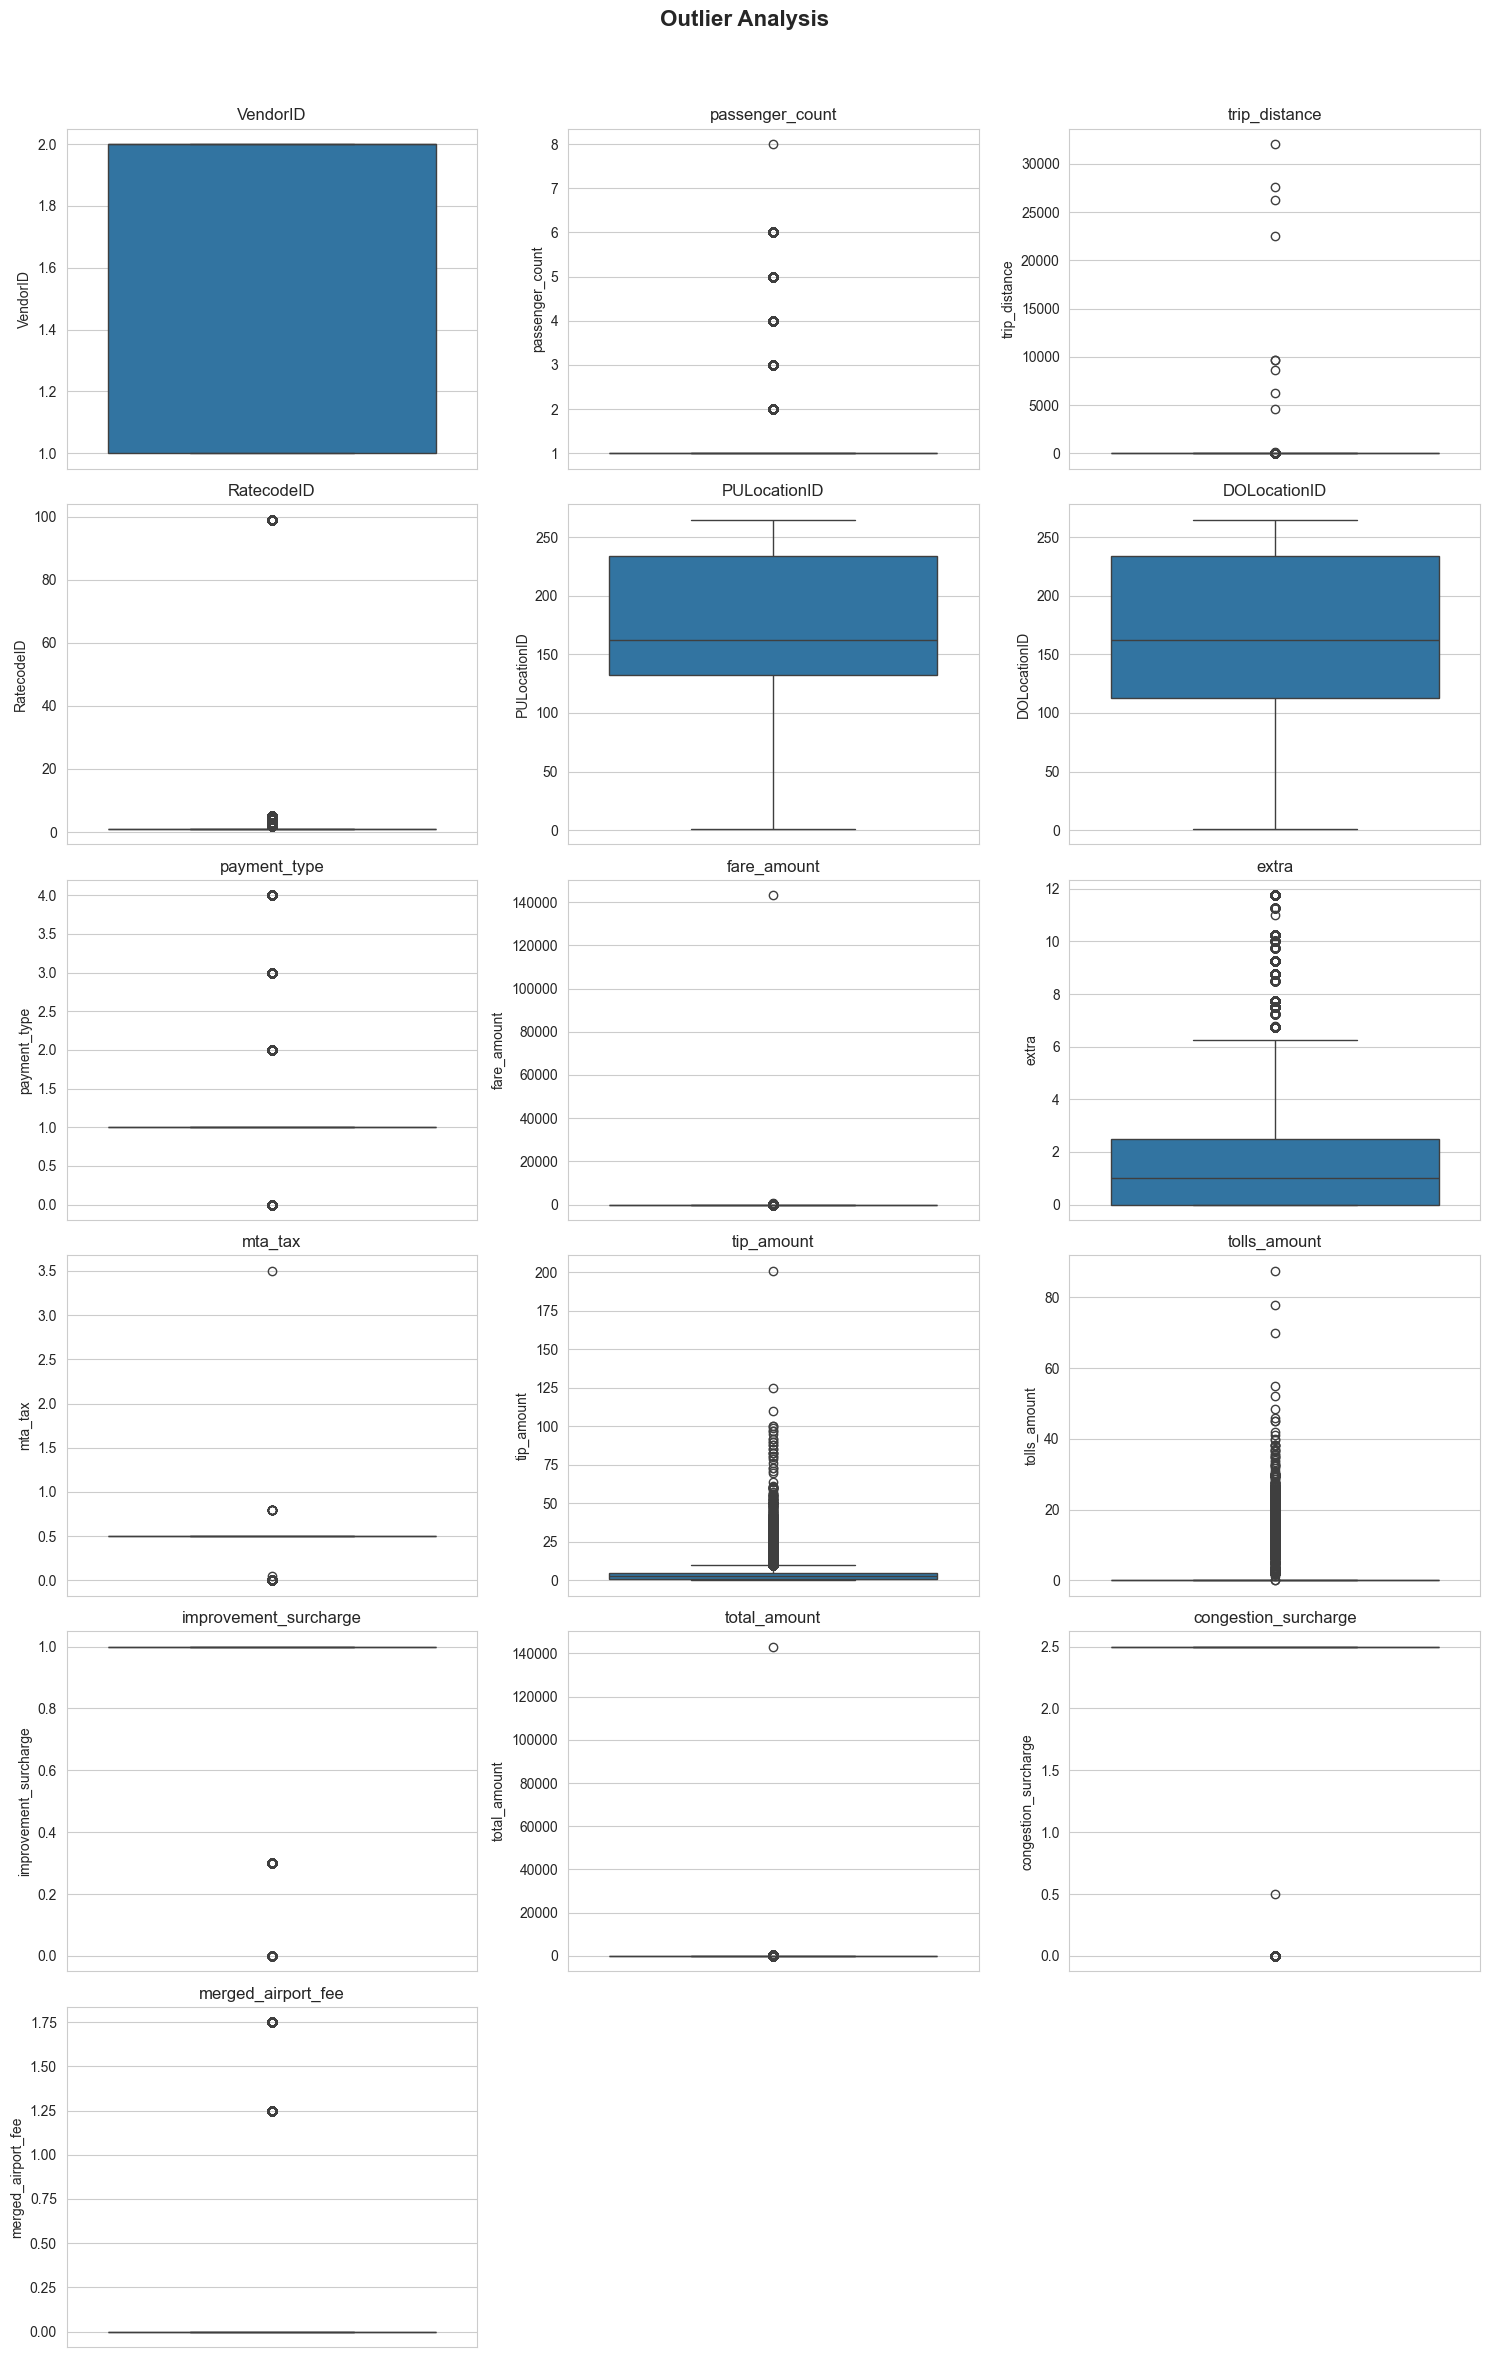

In [114]:
numeric_cols = df.select_dtypes(include=['number'])
num_cols = len(numeric_cols.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # 3 plots per row

fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))  
fig.suptitle("Outlier Analysis", fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(data=numeric_cols[col], ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")  # Remove x-labels for clarity
    axes[i].set_ylabel(col, fontsize=10)
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [115]:
# remove passenger_count > 6
df = df[df["passenger_count"] <= 6]

In [116]:
# Continue with outlier handling
#trip Distance . Total_amount and trip distance totally out of the sync, as well it is cab sevrice so removing these outliers  
df = df[df["trip_distance"] <= 250]
#RatecodeID Not required to remove Outliers as per df['RatecodeID'].value_counts()
#drop where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance']< 1.0) & (df['fare_amount'] >  300))]
#drop entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different 
df = df[~((df["trip_distance"] == 0) & (df['fare_amount'] == 0 ) & (df['PULocationID'] != df['DOLocationID']))]

In [117]:
# Do any columns need standardising?
#replace payment_type == 0 with most frequently used like wise for RatecodeID == 99 as these values are not there data dictionary
df.loc[df['payment_type'] == 0, 'payment_type'] = df.loc[df['payment_type'] != 0, 'payment_type'].mode()[0]
df.loc[df['RatecodeID'] == 99, 'RatecodeID'] = df.loc[df['RatecodeID'] != 0, 'RatecodeID'].mode()[0]
#handling of Fare_amount == 0 and trip distance is greater than zero
median_fare_per_mile = df[df['fare_amount'] > 0].groupby('trip_distance')['fare_amount'].median()
# Apply imputation
df.loc[(df['fare_amount'] == 0) & (df['trip_distance'] > 0), 'fare_amount'] = df['trip_distance'].map(median_fare_per_mile)
    

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [118]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'merged_airport_fee']

In [119]:
df.shape

(284449, 18)

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`



### **Categorical Variables**:
These represent discrete categories or groups:
- **VendorID**
- **RatecodeID**
- **PULocationID** (Pickup Location ID)
- **DOLocationID** (Dropoff Location ID)
- **payment_type**
- **pickup_hour** (if treated as discrete, e.g., hourly categories)

### **Numerical Variables**:
These represent measurable quantities and are typically continuous:
- **passenger_count**
- **trip_distance**
- **trip_duration**
- **fare_amount** (monetary parameter)
- **extra** (monetary parameter)
- **mta_tax** (monetary parameter)
- **tip_amount** (monetary parameter)
- **tolls_amount** (monetary parameter)
- **improvement_surcharge** (monetary parameter)
- **total_amount** (monetary parameter)
- **congestion_surcharge** (monetary parameter)
- **airport_fee** (monetary parameter)

### **Special Note on Dates and Times**:
- **tpep_pickup_datetime**: Typically treated as a **datetime** variable, which can be processed further to extract numerical components (e.g., day, month, hour) or categorized based on need.
- **tpep_dropoff_datetime**: Similarly, a **datetime** variable for processing.



##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

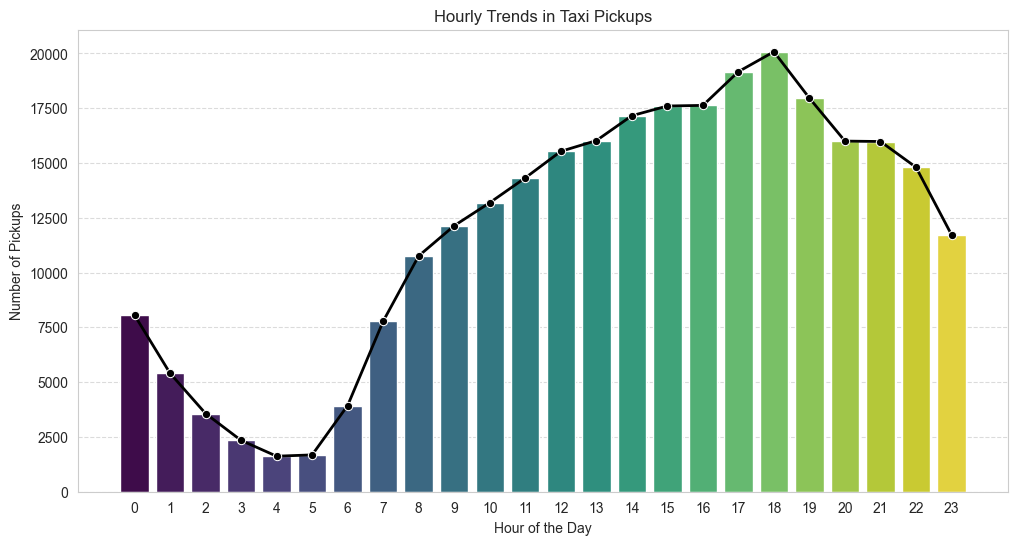

In [120]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
hourly_pickups = df.groupby("pickup_hour").size()
# Plot the hourly trends
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
#sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="viridis")
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="viridis", hue=hourly_pickups.index, legend=False)
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, color='black', marker='o', linewidth=2)

# Labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Trends in Taxi Pickups')
plt.xticks(range(24))  # Show all hours from 0 to 23
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

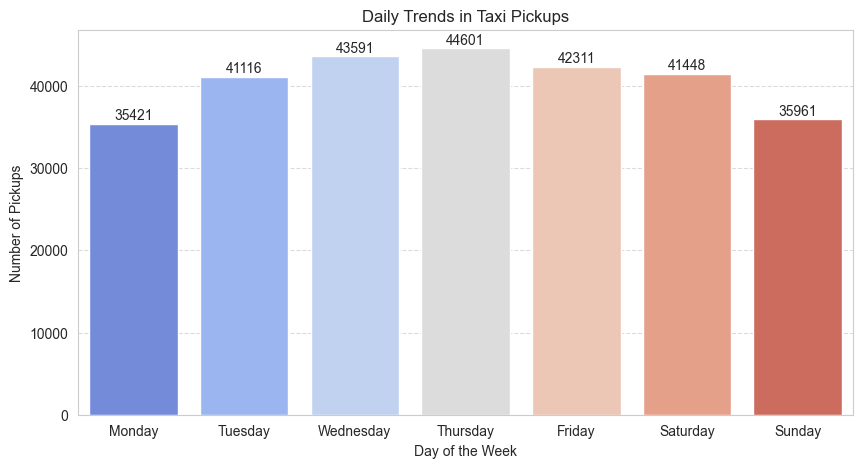

In [121]:
# Find and show the daily trends in taxi pickups (days of the week)

# Extract the day of the week (0=Monday, 6=Sunday)
df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.dayofweek

# Define day labels
daysofweek = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group by day and count pickups
daily_pickups = df.groupby('pickup_day').size()

# Plot the daily trends
plt.figure(figsize=(10, 5))
sns.barplot(x=daysofweek, y=daily_pickups.values, palette="coolwarm", hue=daysofweek, legend=False)

# Labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.title('Daily Trends in Taxi Pickups')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Show the values on top of bars
for i, val in enumerate(daily_pickups):
    plt.text(i, val + 500, str(val), ha='center', fontsize=10)

plt.show()

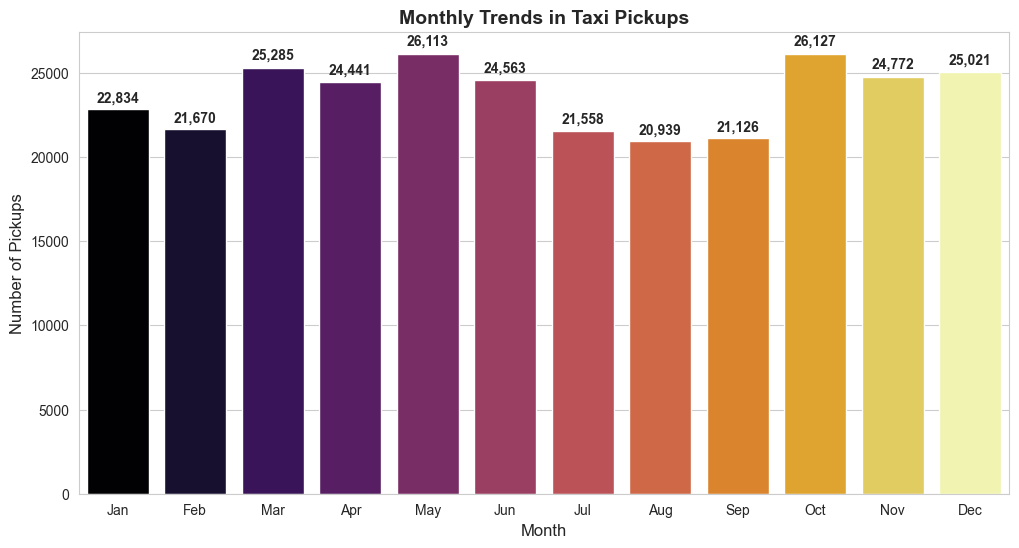

In [122]:
# Show the monthly trends in pickups

# Extract the month from datetime
df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month

# Count pickups per month
monthly_pickups = df['pickup_month'].value_counts().sort_index()

# Plot the monthly trends
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="inferno", hue=monthly_pickups.index, legend=False)

# Add labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.title("Monthly Trends in Taxi Pickups", fontsize=14, fontweight='bold')

# Correct x-axis labels
plt.xticks(ticks=range(12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], fontsize=10)

# Show values on top of bars
for i, val in enumerate(monthly_pickups.values):
    plt.text(i, val * 1.02, f"{val:,}", ha='center', fontsize=10, fontweight='bold')

plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [123]:
# Analyse the above parameters
cols = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Count zero values
zero_counts = (df[cols] == 0).sum()

# Count negative values
negative_counts = (df[cols] < 0).sum()

# Display results
print(f"Number of zero values in below Columns:\n{zero_counts}")
print(f"\nNumber of negative values in below Columns:\n{negative_counts}")


Number of zero values in below Columns:
fare_amount         37
tip_amount       65624
total_amount        36
trip_distance     5504
dtype: int64

Number of negative values in below Columns:
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [124]:
# Create a df with non zero entries for the selected parameters.
cols1 = ["fare_amount", "total_amount","trip_distance","total_amount" ]
print(f"zero values counts :\n{(df[cols1]==0).sum()}")
#Remove where fare amount and total amount are zeros 
df = df[((df["fare_amount"] > 0) &  (df["total_amount"] > 0))]
#keep where trip distance or fare amount is greater than zero
df = df[(df["trip_distance"] > 0) | (df["fare_amount"] > 0)]
print(f"after removing zero values :\n{(df[cols1]==0).sum()}")

zero values counts :
fare_amount        37
total_amount       36
trip_distance    5504
total_amount       36
dtype: int64
after removing zero values :
fare_amount         0
total_amount        0
trip_distance    5467
total_amount        0
dtype: int64


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284399 entries, 0 to 284470
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               284399 non-null  int64         
 1   tpep_pickup_datetime   284399 non-null  datetime64[us]
 2   tpep_dropoff_datetime  284399 non-null  datetime64[us]
 3   passenger_count        284399 non-null  float64       
 4   trip_distance          284399 non-null  float64       
 5   RatecodeID             284399 non-null  float64       
 6   PULocationID           284399 non-null  int64         
 7   DOLocationID           284399 non-null  int64         
 8   payment_type           284399 non-null  int64         
 9   fare_amount            284399 non-null  float64       
 10  extra                  284399 non-null  float64       
 11  mta_tax                284399 non-null  float64       
 12  tip_amount             284399 non-null  float64  

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

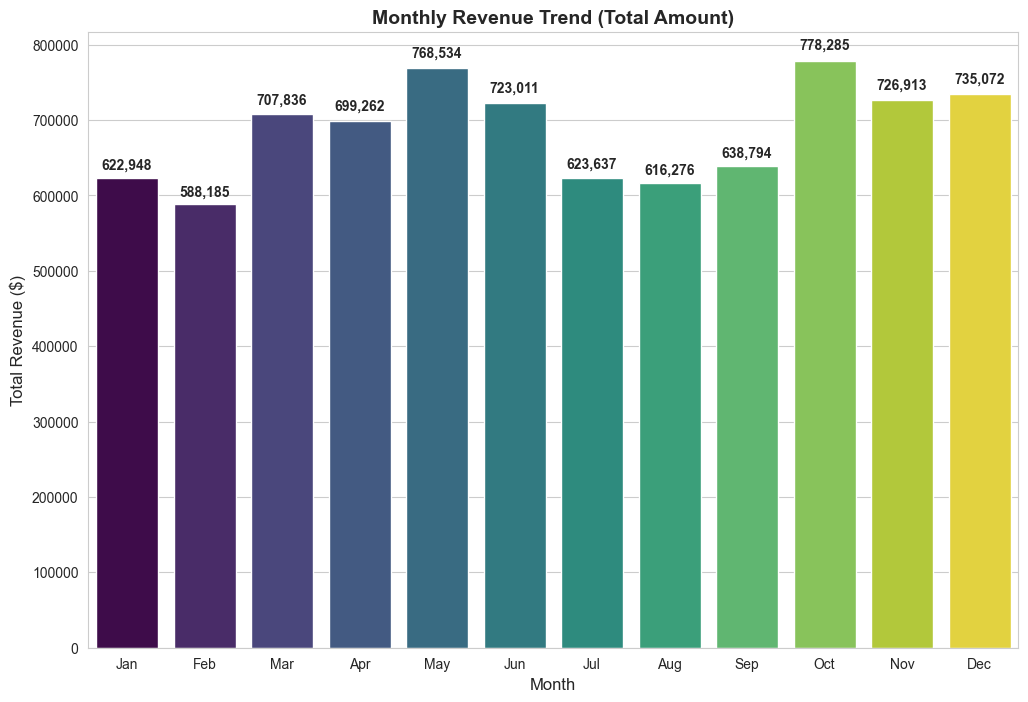

In [126]:
# Group data by month and analyse monthly revenue

# Group by month and calculate total revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().sort_index()
#print(monthly_revenue)
# Plot the revenue trend
plt.figure(figsize=(12, 8))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="viridis", order=range(1, 13),hue=monthly_revenue.index,legend=False)

# Add labels and title
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.title("Monthly Revenue Trend (Total Amount)", fontsize=14, fontweight='bold')

# Format x-axis labels
plt.xticks(ticks=range(12), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
], fontsize=10)

# Show values on top of bars
for i, val in enumerate(monthly_revenue.values):
    plt.text(i, val * 1.02, f"{val:,.0f}", ha='center', fontsize=10, fontweight='bold')

plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

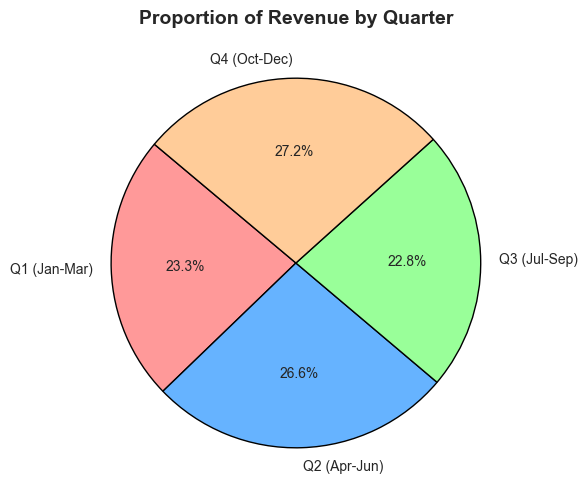

In [127]:
# Calculate proportion of each quarter

df['quarter'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum()

# Define Labels and Colors
labels = ["Q1 (Jan-Mar)", "Q2 (Apr-Jun)", "Q3 (Jul-Sep)", "Q4 (Oct-Dec)"]

# Plot the Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(quarterly_revenue, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], startangle=140, wedgeprops={'edgecolor': 'black'})

# Title and Show
plt.title("Proportion of Revenue by Quarter", fontsize=14, fontweight='bold')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip_distance and fare_amount: 0.9454


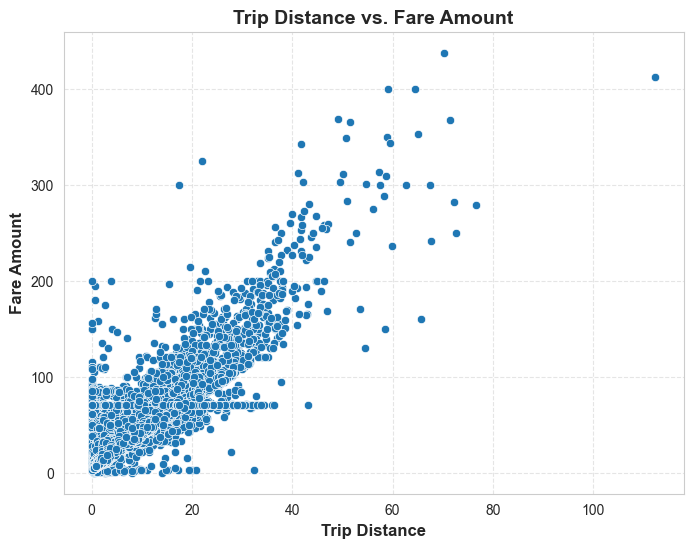

In [128]:
# Show how trip fare is affected by distance

df1 = df[df['trip_distance'] > 0]

# Step 2: Compute correlation
correlation = df1["trip_distance"].corr(df1["fare_amount"])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")

# Step 3: Create the figure
plt.figure(figsize=(8, 6))

# Step 4: Scatter plot with transparency for clarity
sns.scatterplot(
    x="trip_distance", 
    y="fare_amount", 
    data=df1,
)
# Step 6: Customize labels and titles
plt.xlabel("Trip Distance", fontsize=12, fontweight='bold')
plt.ylabel("Fare Amount", fontsize=12, fontweight='bold')
plt.title("Trip Distance vs. Fare Amount", fontsize=14, fontweight='bold')

# Step 7: Grid and Adjust Layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between trip_duration and fare_amount: 0.2766


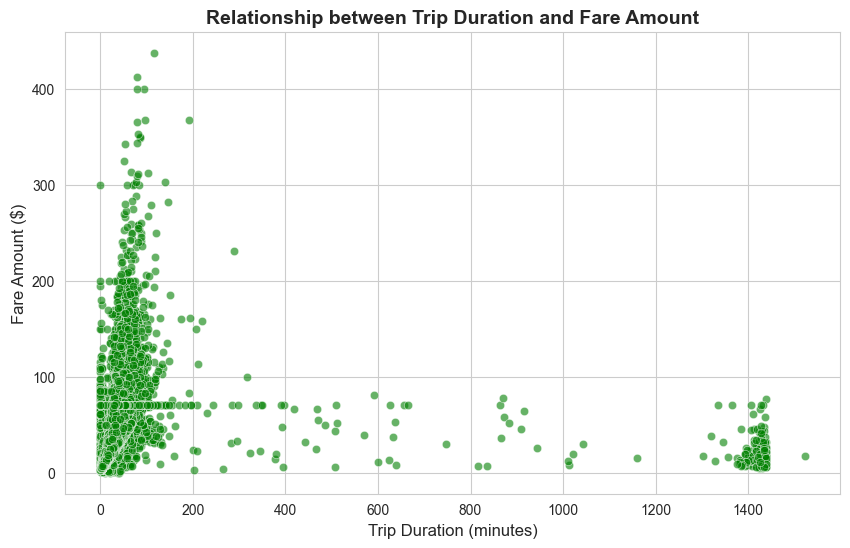

In [129]:
# Show relationship between fare and trip duration

# Calculate the trip duration in minutes
df1 = df1.copy()
df1['trip_duration_mins'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter out rows with zero or negative duration (if any)
df1 = df1[df1['trip_duration_mins'] > 0]

# Calculate the correlation coefficient between trip_duration and fare_amount
correlation = df1['trip_duration_mins'].corr(df1['fare_amount'])
print(f"Correlation between trip_duration and fare_amount: {correlation:.4f}")

# Plot the scatter plot between fare amount and trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1['trip_duration_mins'], y=df1['fare_amount'], color='green', alpha=0.6)

# Add labels and title
plt.xlabel("Trip Duration (minutes)", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.title("Relationship between Trip Duration and Fare Amount", fontsize=14, fontweight='bold')
# Show the plot
plt.show()

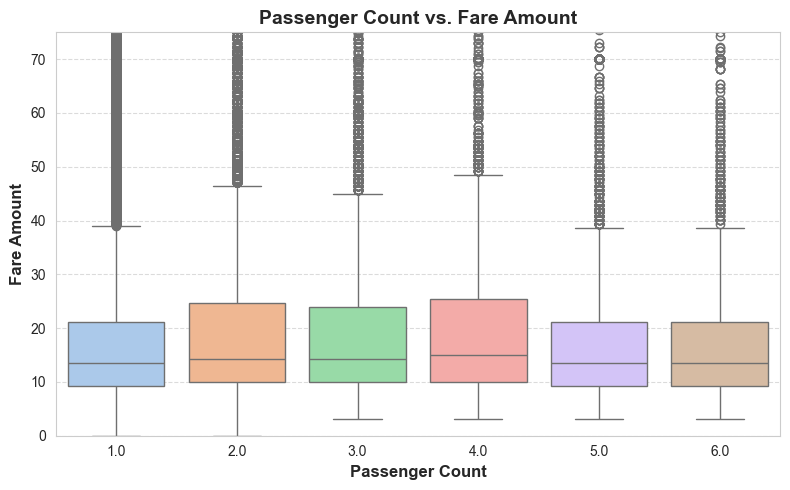

In [130]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 5))

ax = sns.boxplot(
    data=df1, 
    x='passenger_count', 
    y='fare_amount', hue='passenger_count',legend=False, 
    palette="pastel", 
    showfliers=True
)
plt.ylim(0, df1["fare_amount"].quantile(0.99))

# Add title and labels
plt.title("Passenger Count vs. Fare Amount", fontsize=14, fontweight='bold')
plt.xlabel("Passenger Count", fontsize=12, fontweight='bold')
plt.ylabel("Fare Amount", fontsize=12, fontweight='bold')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

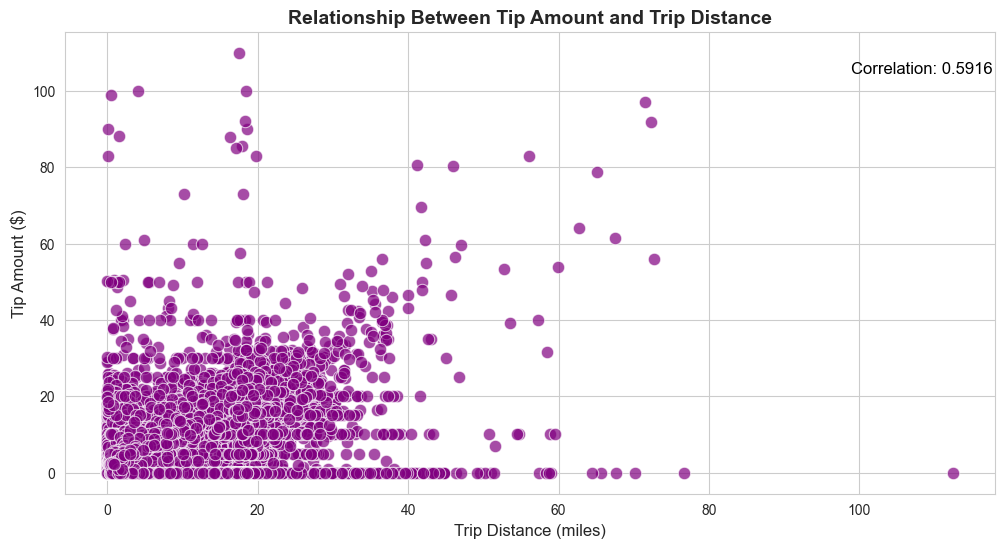

In [131]:
# Show relationship between tip and trip distance
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df1, color='purple', s=80, alpha=0.7)

# Add labels and title
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.title('Relationship Between Tip Amount and Trip Distance', fontsize=14, fontweight='bold')

# Display correlation value
correlation = df1['trip_distance'].corr(df1['tip_amount'])
plt.figtext(0.78, 0.81, f'Correlation: {correlation:.4f}', fontsize=12, color='black')

plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

- 1= Credit card 
- 2= Cash 
- 3= No charge 
- 4= Dispute 

In [132]:
# Analyse the distribution of different payment types (payment_type).
payment_type_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided Trip"
}
df1['payment_type'] = df1['payment_type'].map(payment_type_mapping)
payment_counts = df1['payment_type'].value_counts()
payment_percentage = df1['payment_type'].value_counts(normalize=True) * 100
payment_percentage


payment_type
Credit Card    82.227560
Cash           16.731262
Dispute         0.672606
No Charge       0.368571
Name: proportion, dtype: float64

In [133]:
payment_percentage

payment_type
Credit Card    82.227560
Cash           16.731262
Dispute         0.672606
No Charge       0.368571
Name: proportion, dtype: float64

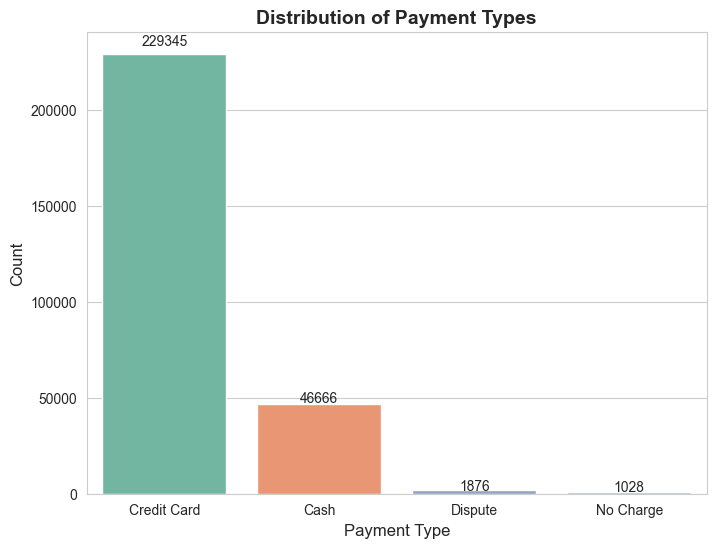

In [134]:
# Count the occurrences of each payment type
payment_type_counts = df1['payment_type'].value_counts()

# Plot the distribution of payment types
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='Set2',hue=payment_type_counts.index,legend=False)

# Add labels and title
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Payment Types', fontsize=14, fontweight='bold')

# Show values on top of bars
for i, val in enumerate(payment_type_counts.values):
    plt.text(i, val * 1.02, str(val), ha='center', fontsize=10)

plt.show()

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [135]:
!pip install geopandas --no-warn-script-location

Defaulting to user installation because normal site-packages is not writeable


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [136]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\krisp\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


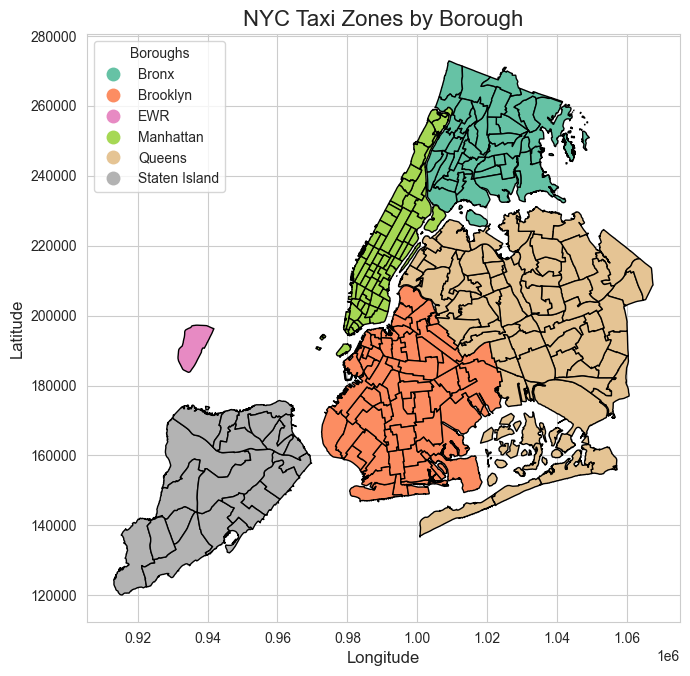

In [137]:
print(zones.info())
fig, ax = plt.subplots(figsize=(7, 7))

zones.plot(
    column="borough",
    cmap="Set2",
    edgecolor="black",
    legend=True,
    ax=ax,
    legend_kwds={
        'loc': 'upper left',         
        'bbox_to_anchor': (0, 1),   
        'title': 'Boroughs'     
    }
)

ax.set_title("NYC Taxi Zones by Borough", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

plt.tight_layout()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [138]:
# Merge zones and trip records using locationID and PULocationID
df2 = df1.merge(zones, left_on="PULocationID", right_on="LocationID", how="left")

# Check the merged DataFrame
df2.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-01 00:18:33   2023-01-01 00:54:44              1.0   
1         1  2023-01-01 00:26:16   2023-01-01 01:01:26              2.0   
2         1  2023-01-01 00:27:02   2023-01-01 00:34:16              1.0   
3         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
4         1  2023-01-01 00:27:51   2023-01-01 00:35:03              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID payment_type  \
0           21.0         2.0           132           238  Credit Card   
1            5.5         1.0           246            41  Credit Card   
2            1.2         1.0           263            75  Credit Card   
3            7.1         1.0           246            37  Credit Card   
4            1.2         1.0           236           236  Credit Card   

   fare_amount  ...  pickup_month  quarter  trip_duration_mins  OBJECTID  \
0         70.0  ...             1        1           36.183333     132.0   
1         25.5  ...             1        1           35.166667     246.0   
2          7.9  ...             1        1            7.233333     263.0   
3         34.5  ...             1        1           33.616667     246.0   
4          9.3  ...             1        1            7.200000     236.0   

   Shape_Leng  Shape_Area                       zone  LocationID    borough  \
0    0.245479    0.002038                JFK Airport       132.0     Queens   
1    0.069467    0.000281  West Chelsea/Hudson Yards       246.0  Manhattan   
2    0.037017    0.000066             Yorkville West       263.0  Manhattan   
3    0.069467    0.000281  West Chelsea/Hudson Yards       246.0  Manhattan   
4    0.044252    0.000103      Upper East Side North       236.0  Manhattan   

                                            geometry  
0  MULTIPOLYGON (((1032791.001 181085.006, 103283...  
1  POLYGON ((983031.177 217138.506, 983640.32 216...  
2  POLYGON ((997493.323 220912.386, 997355.264 22...  
3  POLYGON ((983031.177 217138.506, 983640.32 216...  
4  POLYGON ((995940.048 221122.92, 995812.322 220...  

[5 rows x 30 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [139]:
# Group data by location and calculate the number of trips
trips_per_location = df2.groupby("PULocationID").size().reset_index(name="num_trips")
trips_per_location = trips_per_location.merge(df2[["PULocationID", "zone"]].drop_duplicates(), on="PULocationID", how="left")
# Sort by most popular locations
trips_per_location = trips_per_location.sort_values(by="num_trips", ascending=False)

# Display the top 10 locations with zone names
trips_per_location[['PULocationID','zone','num_trips']].head(10)


PULocationID                          zone  num_trips
114           132                   JFK Airport      14532
210           237         Upper East Side South      13136
141           161                Midtown Center      13037
209           236         Upper East Side North      11713
142           162                  Midtown East       9929
120           138             LaGuardia Airport       9683
164           186  Penn Station/Madison Sq West       9475
124           142           Lincoln Square East       9285
203           230     Times Sq/Theatre District       9150
150           170                   Murray Hill       8299

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [140]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trips_per_location, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values (for locations with no trips) with 0
zones["num_trips"] = zones["num_trips"].fillna(0)
zones.head()


OBJECTID  Shape_Leng  Shape_Area                   zone_x  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  num_trips                   zone_y  
0           1.0        8.0           Newark Airport  
1           NaN        0.0                      NaN  
2           3.0        9.0  Allerton/Pelham Gardens  
3           4.0      320.0            Alphabet City  
4           5.0        2.0            Arden Heights

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

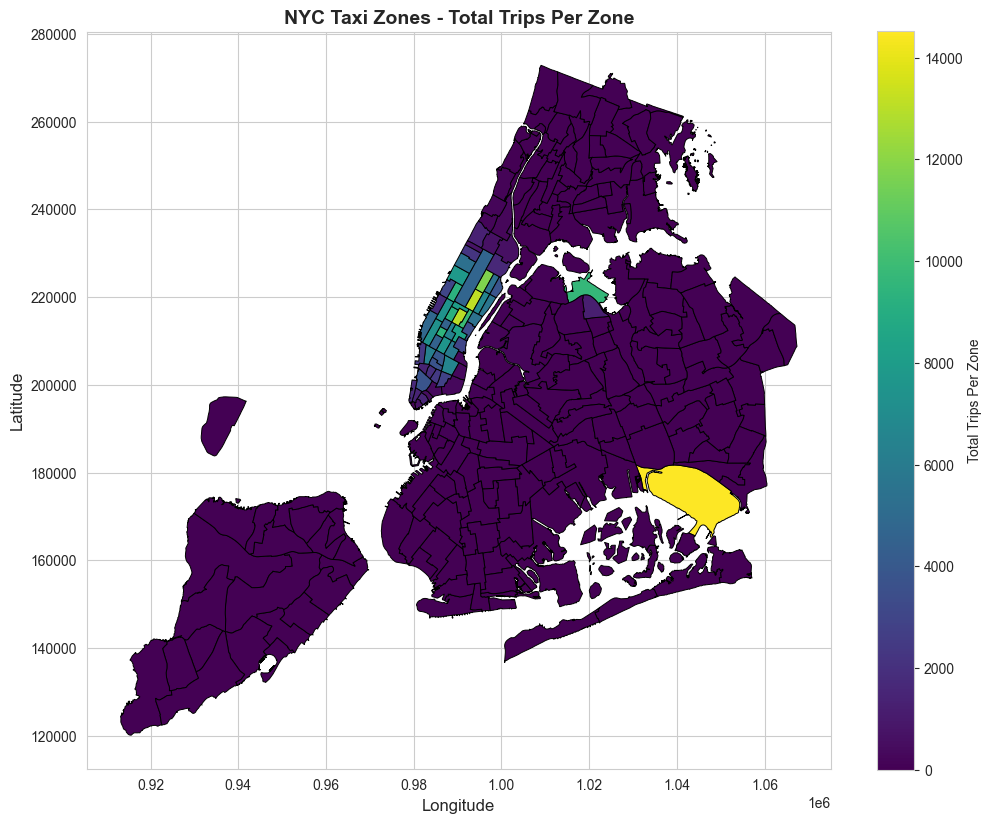

In [141]:
import matplotlib.colors as mcolors
import matplotlib.patheffects as pe

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 20))

# Plot the map and display it

# Plot NYC taxi zones colored by the number of trips
zones.sort_values(by="num_trips", ascending=False).plot(column="num_trips", cmap="viridis", edgecolor="black", linewidth=0.7,
           legend=True, ax=ax, 
       legend_kwds={'label': "Total Trips Per Zone", 'orientation': "vertical",'shrink': 0.48})

# Title and labels
plt.title("NYC Taxi Zones - Total Trips Per Zone", fontsize=14, fontweight='bold')
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Show plot
plt.show()


In [142]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones.sort_values(by="num_trips", ascending=False)
zones_sorted[["LocationID", "borough", "zone_x", "num_trips"]].head(10)


LocationID    borough                        zone_x  num_trips
131         132     Queens                   JFK Airport    14532.0
236         237  Manhattan         Upper East Side South    13136.0
160         161  Manhattan                Midtown Center    13037.0
235         236  Manhattan         Upper East Side North    11713.0
161         162  Manhattan                  Midtown East     9929.0
137         138     Queens             LaGuardia Airport     9683.0
185         186  Manhattan  Penn Station/Madison Sq West     9475.0
141         142  Manhattan           Lincoln Square East     9285.0
229         230  Manhattan     Times Sq/Theatre District     9150.0
169         170  Manhattan                   Murray Hill     8299.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


Here’s a cohesive conclusion for your analysis, incorporating the mentioned points:
The analysis of NYC taxi operations has provided valuable insights into key patterns and trends:
-	Busiest Hours, Days, and Months:
o	Taxi pickups peak during evening hours, especially between 17:00 and 19:00, aligning with office exits and social events.
o	Demand is highest on midweek days (Wednesday and Thursday), with slightly lower activity around weekends due to vacation travel and remote work trends.
o	The summer months (July to September) see the lowest activity due to school holidays and vacation preferences.

	Trends in Revenue Collected:
o	Revenue shows consistency with higher earnings during peak hours and midweek days, reflecting increased demand.
o	Seasonal fluctuations indicate dips in revenue during summer months, aligning with reduced taxi usage.
	Trends in Quarterly Revenue:
o	Revenue exhibits quarterly patterns, with the first and fourth quarters showing higher earnings, possibly influenced by office activity and holiday travel.
o	Summer quarters tend to have lower revenue due to the vacation effect.
	Dependency of Fare on Trip Distance, Duration, and Passenger Count:
o	Fare amount strongly correlates with trip distance (0.9454), indicating distance as a major fare determinant.
o	Trip duration influences fare, particularly during peak traffic hours.
o	Passenger count shows no significant impact on fare, aside from cases involving higher passenger counts requiring larger vehicles.
	Dependency of Tip Amount on Trip Distance:
o	Tip amounts tend to increase with trip distance, reflecting longer rides and higher fare totals encouraging larger tips.
	Busiest Zones:
o	Pickup and drop-off zones around business hubs and entertainment areas show significantly higher taxi activity during peak hours.
These findings provide actionable insights into operational optimization, revenue forecasting, and customer behavior patterns.



#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [143]:
# Find routes which have the slowest speeds at different times of the day

# Filter out rows where trip duration or speed is negative
df2['trip_duration_hours'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_filtered_clean = df2[(df2["trip_duration_hours"] > 0) & (df2["trip_distance"] > 0)]

# Group by route and hour again with cleaned data
route_speed_clean = df_filtered_clean.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_duration=("trip_duration_hours", "mean"),  # Average trip duration per route-hour
    total_distance=("trip_distance", "mean")  # Total distance per route-hour
).reset_index()

# Compute speed (distance / avg duration)
route_speed_clean["avg_speed"] = route_speed_clean["total_distance"] / (route_speed_clean["avg_duration"] + 1e-5)  # Avoid division by zero

# Find the slowest routes (smallest speed)
slowest_routes_clean = route_speed_clean.sort_values(by="avg_speed", ascending=True).head(10)  # Adjust for top N slowest routes

# Display the cleaned slowest routes
slowest_routes_clean

PULocationID  DOLocationID  pickup_hour  avg_duration  total_distance  \
33827           151            50           22      0.655833            0.01   
36049           161           129           21      4.418333            0.11   
60646           260           129           17     23.560556            0.96   
63626           264           237           15      0.929444            0.04   
17815           113           235           22      5.820556            0.28   
5711             50           100           22     23.667222            1.34   
29106           141           232           15     13.913056            1.00   
39997           164           100           21      7.833889            0.67   
480              12            45            9     23.027778            2.09   
34803           158           100            0     23.979722            2.30   

       avg_speed  
33827   0.015248  
36049   0.024896  
60646   0.040746  
63626   0.043036  
17815   0.048105  
5711    0.056618  
29106   0.071875  
39997   0.085526  
480     0.090760  
34803   0.095914

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

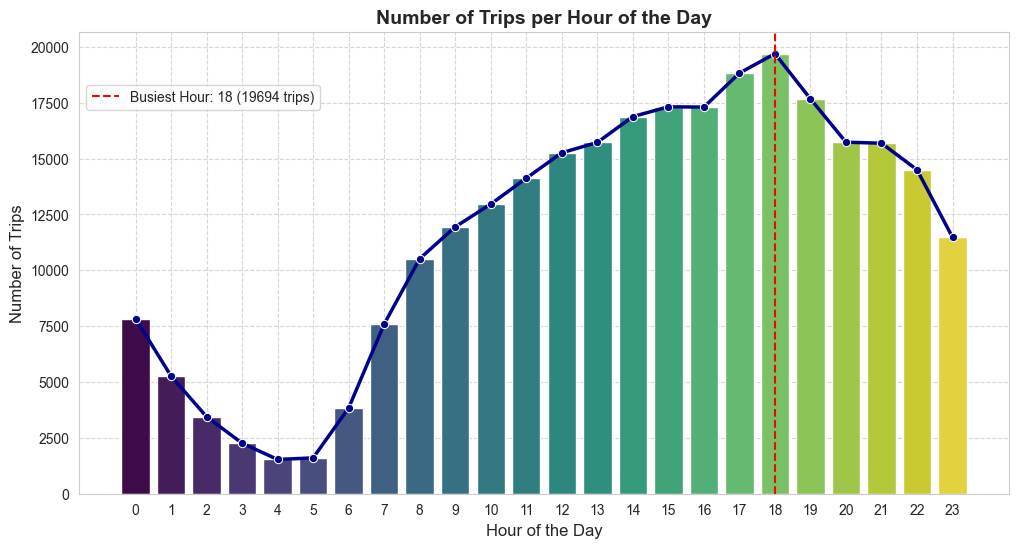

In [144]:
# Visualise the number of trips per hour and find the busiest hour

# Calculate the number of trips per hour
trips_per_hour = df2.groupby('pickup_hour').size()

# Find the busiest hour
busiest_hour = trips_per_hour.idxmax()  # Hour with max trips
busiest_hour_trips = trips_per_hour.max()  # Number of trips in that hour

# Create the figure
plt.figure(figsize=(12, 6))

# Bar plot for the number of trips per hour
sns.barplot(x=trips_per_hour.index, y=trips_per_hour.values, palette='viridis',hue=trips_per_hour.index,legend=False)

# Line plot to show the trend
sns.lineplot(x=trips_per_hour.index, y=trips_per_hour.values, color="darkblue", marker="o",markersize=6, linewidth=2.5)

# Highlight the busiest hour with a vertical line
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Busiest Hour: {busiest_hour} ({busiest_hour_trips} trips)')

# Add labels and title
plt.title('Number of Trips per Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.8)
# Show the legend
plt.legend(loc="upper left", bbox_to_anchor=(0, 0.9), fontsize=10)

# Show the plot
plt.show()

# Return the busiest hour and its trip count
#busiest_hour, busiest_hour_trips



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [145]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

trip_count_per_hour = df2.groupby('pickup_hour').size().reset_index(name='trip_count')

# Scale up the number of trips using the sampling fraction
sample_fraction1 = 0.15 
trip_count_per_hour['actual_trip_count_1'] = (trip_count_per_hour['trip_count'] / sample_fraction1).astype(int)
sample_fraction = 0.005
trip_count_per_hour['actual_trip_count'] = (trip_count_per_hour['actual_trip_count_1'] / sample_fraction).astype(int)
# Find the five busiest hours
trip_count_per_hour.drop(columns=['actual_trip_count_1'], inplace=True)

top_5_hours = trip_count_per_hour.nlargest(5, 'trip_count')

# Display results
top_5_hours



pickup_hour  trip_count  actual_trip_count
18           18       19694           26258600
17           17       18822           25096000
19           19       17669           23558600
15           15       17314           23085200
16           16       17301           23068000

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

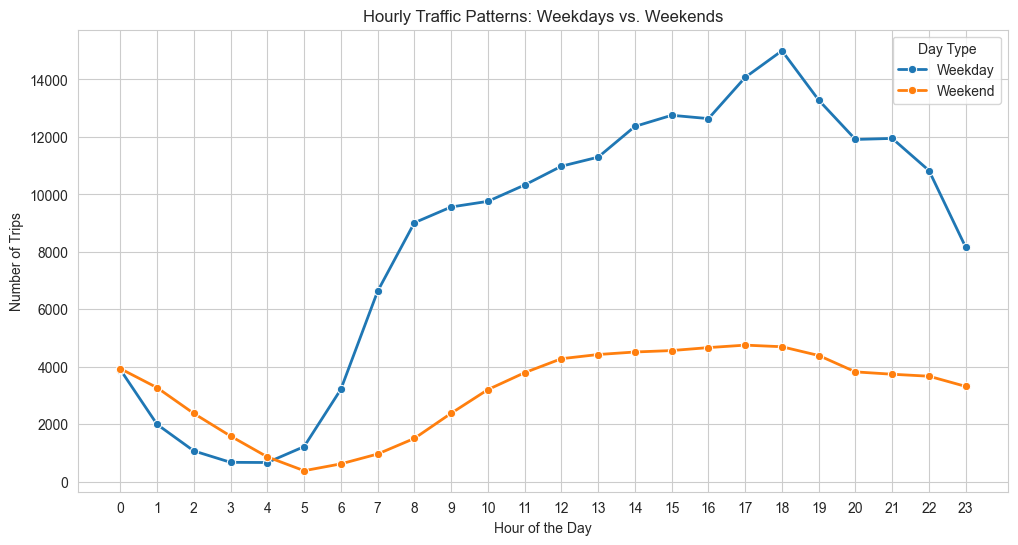

In [146]:
# Compare traffic trends for the week days and weekends

# Separate weekdays and weekends (Weekdays: 0-4, Weekends: 5-6)
weekdays = df2[df2['pickup_day'] <= 4]
weekends = df2[df2['pickup_day'] >= 5]

# Count the number of trips per hour for weekdays and weekends
weekday_counts = weekdays.groupby('pickup_hour').size()
weekend_counts = weekends.groupby('pickup_hour').size()

# Plot the data in one figure
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
# Weekday plot
sns.lineplot(x=weekday_counts.index, y=weekday_counts.values, marker='o', label="Weekday", linewidth=2)

# Weekend plot
sns.lineplot(x=weekend_counts.index, y=weekend_counts.values, marker='o', label="Weekend", linewidth=2)

# Titles and labels
plt.title("Hourly Traffic Patterns: Weekdays vs. Weekends")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.xticks(range(24))

# Legend
plt.legend(title="Day Type")

# Show the plot
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

#### Insights from the Hourly Traffic Patterns:
##### Weekday Trends:

- **Morning Peak**: A sharp increase in trips starts around 6 AM, peaking between 8–9 AM (typical rush hours).
- **Evening Peak**: A second peak occurs between 5–7 PM, aligning with people commuting home.
- **Night Drop**: After 8 PM, trips decline significantly.

##### Weekend Trends:

- **No sharp morning peak**; trips gradually increase until the afternoon.
- **Peak between 12–6 PM**, likely due to leisure activities, shopping, and social events.
- **Trips remain steady in the evening** compared to weekdays, with a slower decline at night.

#### Why Identifying Busy and Quiet Hours is Useful:

**For Businesses & Ride-Sharing Companies**:
- Optimize fleet distribution, ensuring more drivers are available during peak hours.
- Plan surge pricing dynamically to balance supply and demand. 

**For City Planning & Traffic Management**:
- Improve road infrastructure planning based on peak traffic times.
- Adjust public transport schedules to accommodate demand.

**For Customers & Commuters**:
--Avoid travel delays by choosing off-peak hours.
--Plan travel costs effectively when surge pricing is a factor.


### Conclusion:

This analysis helps optimize operations, reduce congestion, and enhance customer experience across multiple industries.

Would you like to dive deeper into specific time segments? 

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

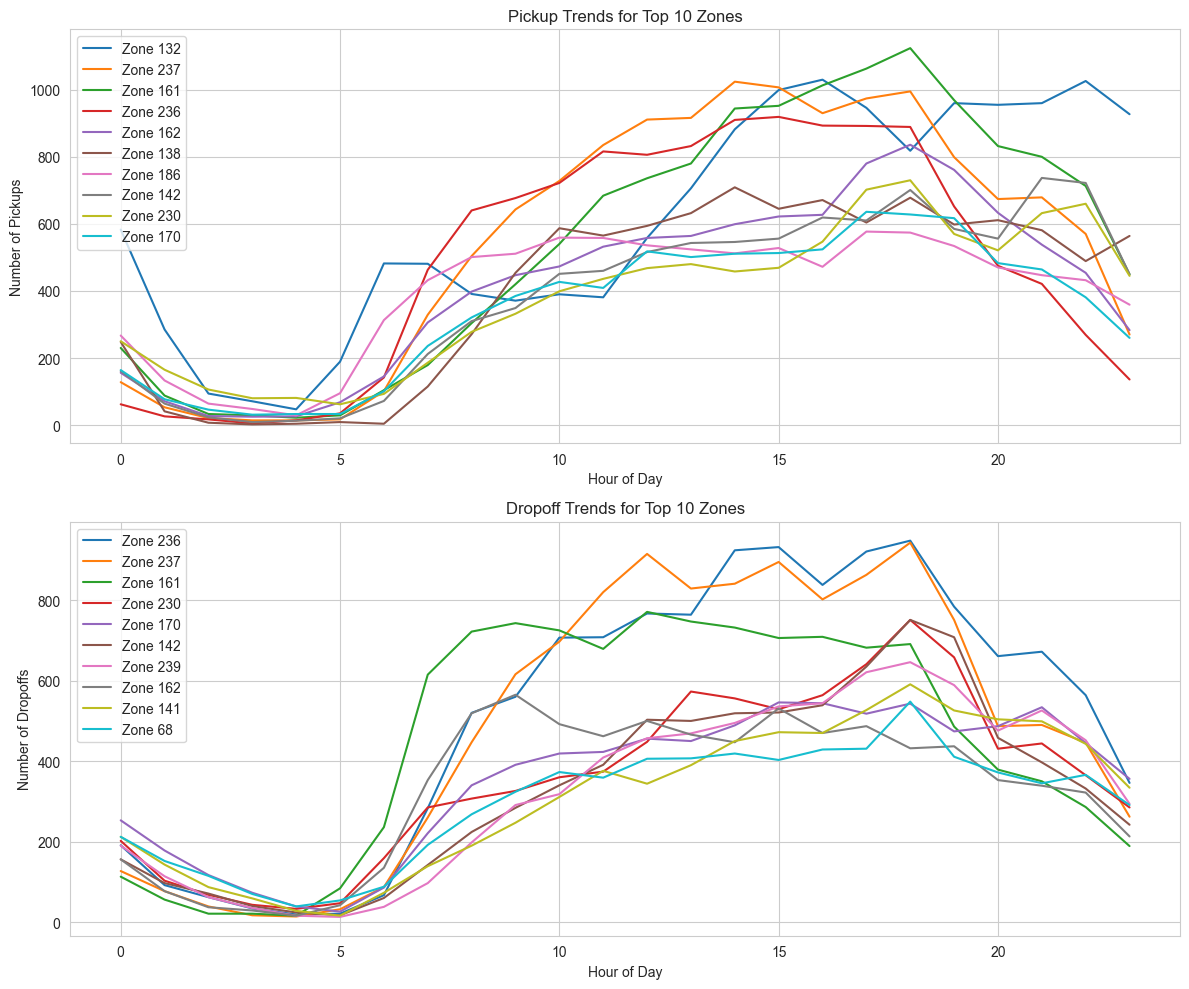

In [147]:
# Find top 10 pickup and dropoff zones
# Group by Pickup Hour and PULocationID
pickup_counts = df2.groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='pickup_count')
df2['dropoff_hour'] = pd.to_datetime(df2['tpep_dropoff_datetime']).dt.hour
# Group by Dropoff Hour and DOLocationID
dropoff_counts = df2.groupby(['dropoff_hour', 'DOLocationID']).size().reset_index(name='dropoff_count')

# Find top 10 pickup zones by total pickups
top_pickup_zones = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index

# Find top 10 dropoff zones by total dropoffs
top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index

# Filter data for these top zones
pickup_top_zones = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]
dropoff_top_zones = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]

# Plot the pickup and dropoff trends for top 10 zones
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Pickup Trends for Top 10 Zones
for zone in top_pickup_zones:
    zone_data = pickup_top_zones[pickup_top_zones['PULocationID'] == zone]
    ax[0].plot(zone_data['pickup_hour'], zone_data['pickup_count'], label=f'Zone {zone}')

ax[0].set_title('Pickup Trends for Top 10 Zones')
ax[0].set_xlabel('Hour of Day')
ax[0].set_ylabel('Number of Pickups')
ax[0].legend(loc='upper left')

# Dropoff Trends for Top 10 Zones
for zone in top_dropoff_zones:
    zone_data = dropoff_top_zones[dropoff_top_zones['DOLocationID'] == zone]
    ax[1].plot(zone_data['dropoff_hour'], zone_data['dropoff_count'], label=f'Zone {zone}')

ax[1].set_title('Dropoff Trends for Top 10 Zones')
ax[1].set_xlabel('Hour of Day')
ax[1].set_ylabel('Number of Dropoffs')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [148]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculate total pickups per zone
pickup_total = pickup_counts.groupby('PULocationID')['pickup_count'].sum()

# Calculate total dropoffs per zone
dropoff_total = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum()

# Combine pickup and dropoff data for each zone into a single DataFrame
zone_data = pd.DataFrame({'total_pickups': pickup_total, 'total_dropoffs': dropoff_total})

# Fill missing values with 0 (zones with only pickups or only dropoffs)
zone_data.fillna(0, inplace=True)

# Avoid division by zero (replace 0 dropoffs with a small number)
zone_data['total_dropoffs'] = zone_data['total_dropoffs'].replace(0, 1)

# Calculate the pickup to dropoff ratio for each zone
zone_data['pickup_dropoff_ratio'] = zone_data['total_pickups'] / zone_data['total_dropoffs']

# Sort by pickup/dropoff ratio (high to low)
top_10_ratios = zone_data.sort_values('pickup_dropoff_ratio', ascending=False).head(10)

# Sort by pickup/dropoff ratio (low to high)
bottom_10_ratios = zone_data.sort_values('pickup_dropoff_ratio', ascending=True).head(10)

# Display the top 10 and bottom 10 pickup/dropoff ratios
print("Top 10 Zones with the Highest Pickup/Dropoff Ratios:")
top_10_ratios


Top 10 Zones with the Highest Pickup/Dropoff Ratios:


total_pickups  total_dropoffs  pickup_dropoff_ratio
70          1236.0             137              9.021898
132        14532.0            3050              4.764590
138         9683.0            3586              2.700223
5              2.0               1              2.000000
186         9475.0            6018              1.574443
114         3697.0            2641              1.399849
43          4664.0            3438              1.356603
249         6218.0            4594              1.353505
162         9929.0            7880              1.260025
161        13037.0           10759              1.211730

In [149]:
print("\nTop 10 Zones with the Lowest Pickup/Dropoff Ratios:")
bottom_10_ratios


Top 10 Zones with the Lowest Pickup/Dropoff Ratios:


total_pickups  total_dropoffs  pickup_dropoff_ratio
44             0.0               3                   0.0
115            0.0               5                   0.0
118            0.0               6                   0.0
99             0.0               1                   0.0
153            0.0               9                   0.0
156            0.0               3                   0.0
30             0.0               4                   0.0
172            0.0               2                   0.0
84             0.0               1                   0.0
27             0.0               5                   0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [150]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter for night hours (11 PM to 5 AM)
night_hours = df2[(df2['pickup_hour'] >= 23) | (df2['pickup_hour'] <= 5)]

# Group by PULocationID for pickups and DOLocationID for dropoffs
pickup_night_counts = night_hours.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_night_counts = night_hours.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge with taxi zone lookup to get zone names
pickup_night_counts = pickup_night_counts.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
dropoff_night_counts = dropoff_night_counts.merge(zones, left_on='DOLocationID', right_on='LocationID', how='left')

# Sort to get the top 10 zones
top_pickup_zones_night = pickup_night_counts.sort_values(by='pickup_count', ascending=False).head(10)
top_dropoff_zones_night = dropoff_night_counts.sort_values(by='dropoff_count', ascending=False).head(10)

# Select only relevant columns for display
top_pickup_zones_night = top_pickup_zones_night.rename(columns={'zone_x': 'Zone', 'PULocationID_x': 'PULocationID'})
top_dropoff_zones_night = top_dropoff_zones_night.rename(columns={'zone_x': 'Zone', 'DOLocationID': 'DOLocationID'})
top_pickup_zones_night = top_pickup_zones_night[['Zone', 'borough', 'PULocationID', 'pickup_count']]
top_dropoff_zones_night = top_dropoff_zones_night[['Zone', 'borough', 'DOLocationID', 'dropoff_count']]
# Display results
print("Top 10 Night Pickup Zones:")
top_pickup_zones_night

Top 10 Night Pickup Zones:


Zone    borough  PULocationID  pickup_count
51                   East Village  Manhattan            79          2422
85                    JFK Airport     Queens           132          2196
171                  West Village  Manhattan           249          1957
28                   Clinton East  Manhattan            48          1656
98                Lower East Side  Manhattan           148          1465
72        Greenwich Village South  Manhattan           114          1322
155     Times Sq/Theatre District  Manhattan           230          1189
125  Penn Station/Madison Sq West  Manhattan           186           995
112                 Midtown South  Manhattan           164           984
43                   East Chelsea  Manhattan            68           897

In [151]:
top_dropoff_zones_night

Zone    borough  DOLocationID  dropoff_count
76                East Village  Manhattan            79           1289
44                Clinton East  Manhattan            48           1111
160                Murray Hill  Manhattan           170            964
100                   Gramercy  Manhattan           107            883
65                East Chelsea  Manhattan            68            876
131            Lenox Hill West  Manhattan           141            801
241             Yorkville West  Manhattan           263            749
228               West Village  Manhattan           249            732
211  Times Sq/Theatre District  Manhattan           230            697
217      Upper East Side North  Manhattan           236            678

<Figure size 960x720 with 0 Axes>

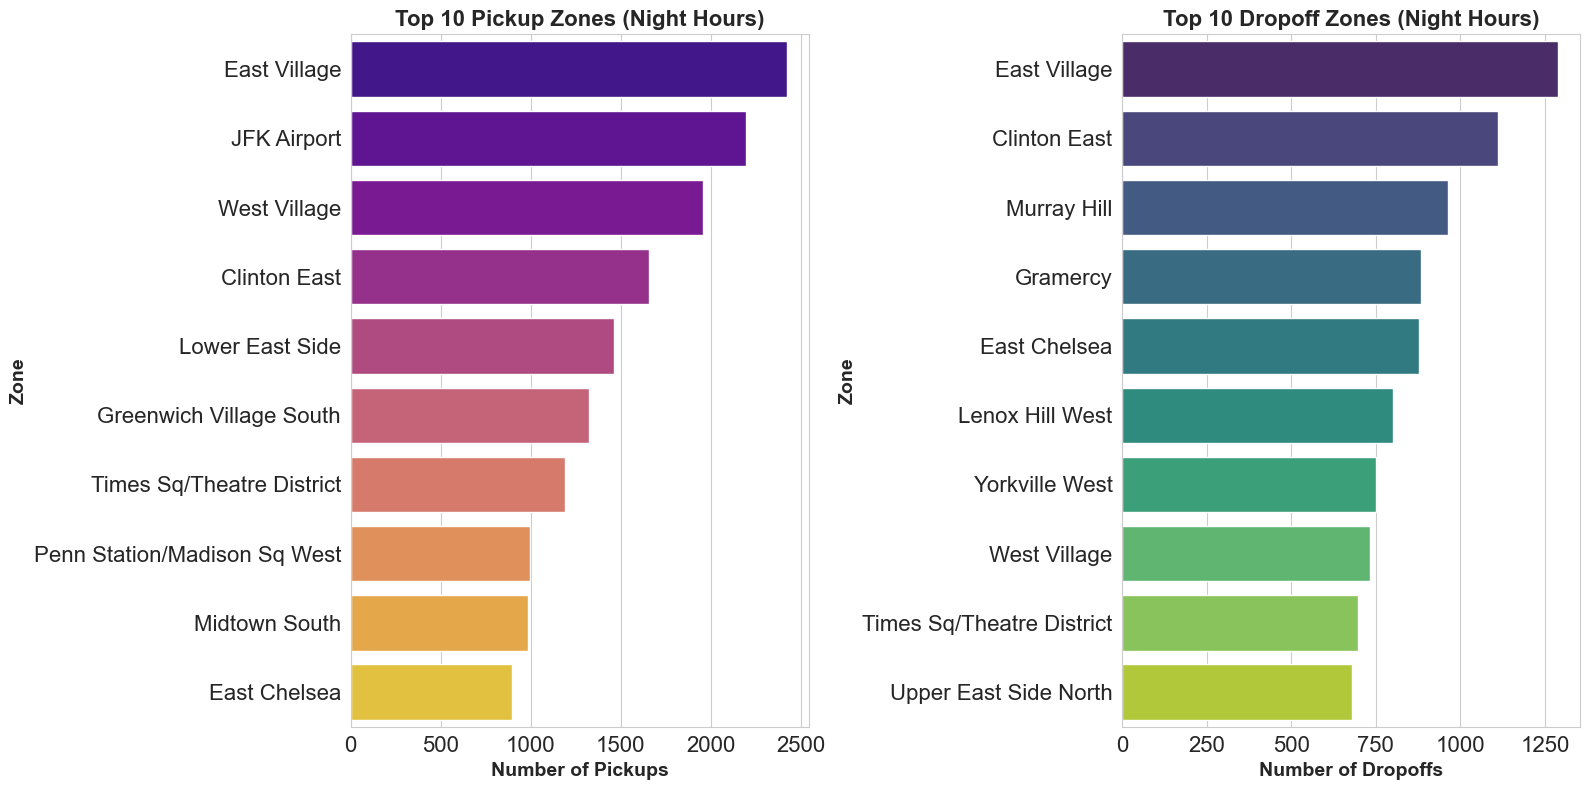

In [152]:
# Set plot style and increase figure quality
sns.set_style("whitegrid")
plt.figure(dpi=150)  # Increase DPI for better clarity

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Define font properties for better readability
title_font = {'fontsize': 16, 'fontweight': 'bold'}
label_font = {'fontsize': 14, 'fontweight': 'bold'}
tick_fontsize = 16

# Plot Pickup Zones
sns.barplot(data=top_pickup_zones_night, x='pickup_count', y='Zone', ax=axes[0], palette="plasma",hue='Zone',legend=False)
axes[0].set_title('Top 10 Pickup Zones (Night Hours)', **title_font)
axes[0].set_xlabel('Number of Pickups', **label_font)
axes[0].set_ylabel('Zone', **label_font)
axes[0].tick_params(axis='y', labelsize=tick_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)

# Plot Dropoff Zones
sns.barplot(data=top_dropoff_zones_night, x='dropoff_count', y='Zone', ax=axes[1], palette="viridis",hue='Zone',legend=False)
axes[1].set_title('Top 10 Dropoff Zones (Night Hours)', **title_font)
axes[1].set_xlabel('Number of Dropoffs', **label_font)
axes[1].set_ylabel('Zone', **label_font)
axes[1].tick_params(axis='y', labelsize=tick_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)

# Rotate Y-axis labels slightly for better readability
for ax in axes:
    yticks = ax.get_yticks()  # Get current tick positions
    ax.set_yticks(yticks)     # Explicitly set tick positions
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [153]:
# Filter for night hours (11 PM to 5 AM)

# Night hours: 11 PM to 5 AM
night_hours_df = df2[(df2['pickup_hour'] >= 23) | (df2['pickup_hour'] <= 5)]

# Day hours: 6 AM to 10 PM
day_hours_df = df2[(df2['pickup_hour'] >= 6) & (df2['pickup_hour'] <= 22)]

# Calculate total revenue for night and day hours
total_revenue_night = night_hours_df['total_amount'].sum()
total_revenue_day = day_hours_df['total_amount'].sum()

# Calculate total revenue overall
total_revenue = df2['total_amount'].sum()

# Calculate revenue share for night and day hours
night_revenue_share = total_revenue_night / total_revenue * 100
day_revenue_share = total_revenue_day / total_revenue * 100

print("night_revenue_share:-", night_revenue_share.round(2),"day_revenue_share:-", day_revenue_share.round(2))

night_revenue_share:- 12.24 day_revenue_share:- 87.76


In [154]:
labels = ['Night Revenue (11 PM - 5 AM)', 'Day Revenue (6 AM - 10 PM)']
values = [night_revenue_share, day_revenue_share]
colors = ['#1f77b4', '#ff7f0e']  # Red-orange for night, green for day

# Create a pie chart
plt.figure(figsize=(5, 5), dpi=120)
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Title and styling
plt.title('Revenue Share: Night vs Day', fontsize=10, fontweight='bold')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [155]:
# Analyse the fare per mile per passenger for different passenger counts

df2 = df2.loc[df2['trip_distance'] > 0].copy()

# Compute fare per mile and fare per mile per passenger
df2['fare_per_mile'] = df2['fare_amount'] / df2['trip_distance']
df2['fare_per_mile_per_passenger'] = (
    df2['fare_per_mile'] / df2['passenger_count']
)

# Group by passenger count and compute average fare per mile per passenger
avg_fare_per_mile_per_passenger = df2.groupby('passenger_count', as_index=False).agg(
    {'fare_per_mile_per_passenger': 'mean'}
)

# **Plotting the results**
plt.figure(figsize=(10, 5))
sns.barplot(
    data=avg_fare_per_mile_per_passenger, 
    x='passenger_count', 
    y='fare_per_mile_per_passenger', 
    palette='viridis',
    hue='passenger_count',
    legend=False
)
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare per Mile per Passenger")
plt.title("Average Fare per Mile per Passenger by Passenger Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()
#avg_fare_per_mile_per_passenger


In [156]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278928 entries, 0 to 278927
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   VendorID                     278928 non-null  int64         
 1   tpep_pickup_datetime         278928 non-null  datetime64[us]
 2   tpep_dropoff_datetime        278928 non-null  datetime64[us]
 3   passenger_count              278928 non-null  float64       
 4   trip_distance                278928 non-null  float64       
 5   RatecodeID                   278928 non-null  float64       
 6   PULocationID                 278928 non-null  int64         
 7   DOLocationID                 278928 non-null  int64         
 8   payment_type                 278928 non-null  object        
 9   fare_amount                  278928 non-null  float64       
 10  extra                        278928 non-null  float64       
 11  mta_tax                      27

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

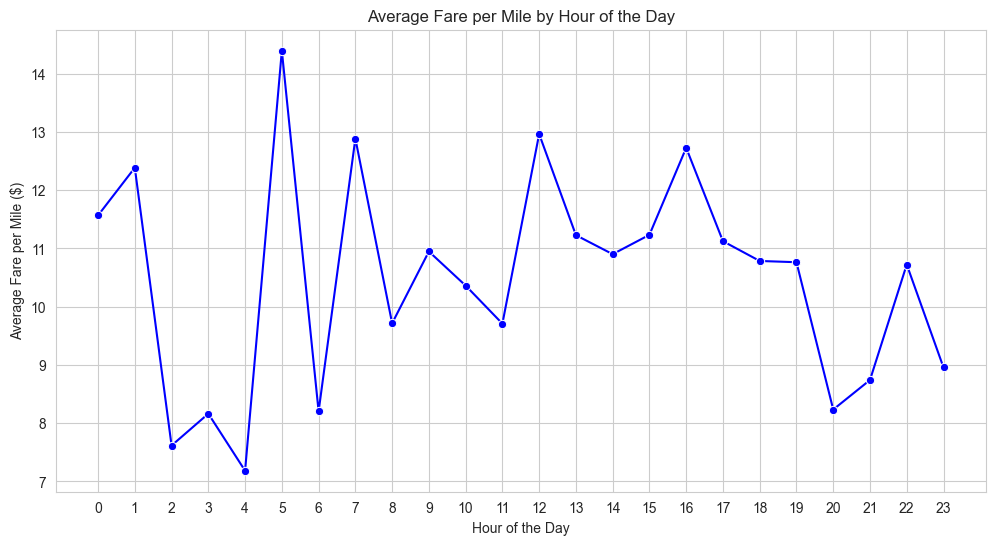

In [157]:
# Compare the average fare per mile for different days and for different times of the day


# Group by hour of the day and calculate average fare per mile
avg_fare_by_hour = df2.groupby('pickup_hour')['fare_per_mile'].mean()

# Group by day of the week and calculate average fare per mile
avg_fare_by_day = df2.groupby('pickup_day')['fare_per_mile'].mean()

# Plot the average fare per mile by hour of day
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_fare_by_hour.index, y=avg_fare_by_hour.values, marker='o', color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24), labels=[f"{i}" for i in range(0, 24)])
plt.show()

# Plot the average fare per mile by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_fare_by_day.index, y=avg_fare_by_day.values, palette="plasma", hue=avg_fare_by_day.index, legend=False)
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Day of the Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

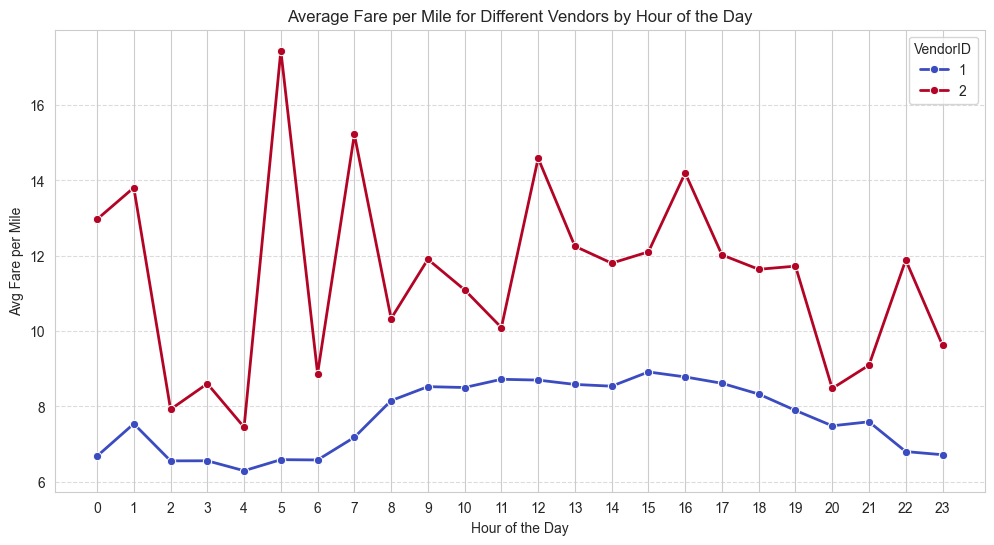

In [158]:
# Compare fare per mile for different vendors

fare_by_vendor_hour = df2.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="pickup_hour", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_hour, 
    marker="o", palette="coolwarm", linewidth=2
)

# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile for Different Vendors by Hour of the Day")
plt.xticks(range(0, 24))
plt.legend(title="VendorID")
plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


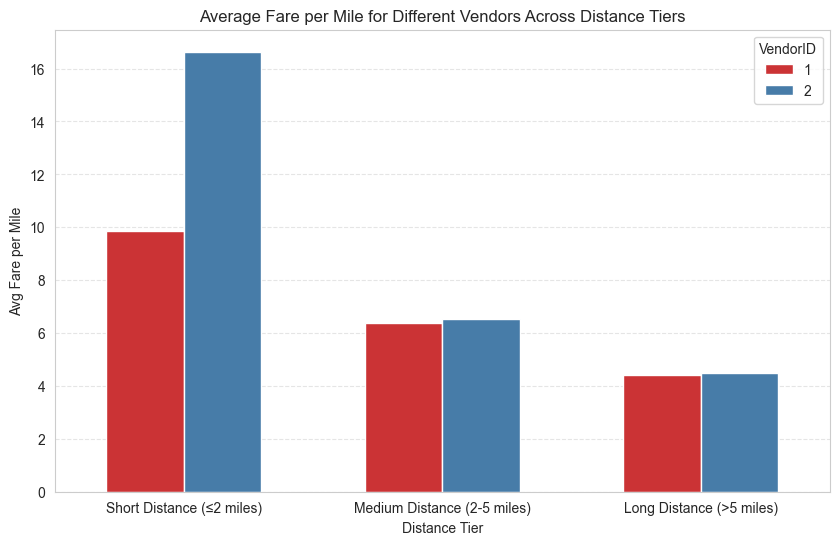

In [159]:
# Defining distance tiers


# Define distance categories
def categorize_distance(distance):
    if distance <= 2:
        return "Short Distance (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium Distance (2-5 miles)"
    else:
        return "Long Distance (>5 miles)"

# Apply categorization
df2["distance_tier"] = df2["trip_distance"].apply(categorize_distance)

# Ensure correct categorical order
distance_order = ["Short Distance (≤2 miles)", "Medium Distance (2-5 miles)", "Long Distance (>5 miles)"]
df2["distance_tier"] = pd.Categorical(df2["distance_tier"], categories=distance_order, ordered=True)

# Group by VendorID & Distance Tier
fare_by_vendor_tier = df2.groupby(["VendorID", "distance_tier"], as_index=False, observed=False).agg(
    {"fare_per_mile": "mean"}
)

# Create grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="distance_tier", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_tier, palette="Set1", dodge=True, width = .6)

# Formatting
plt.xlabel("Distance Tier")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile for Different Vendors Across Distance Tiers")
plt.legend(title="VendorID")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

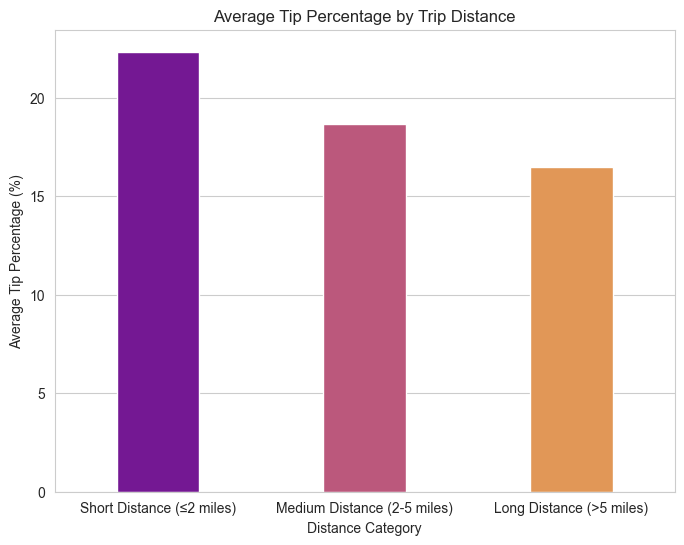

In [160]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df2['tip_percentage'] = (df2['tip_amount'] / df2['fare_amount']) * 100
# Calculate the average tip percentage by distance category
avg_tip_by_distance = df2.groupby('distance_tier',observed=False)['tip_percentage'].mean().reset_index()


# Plot the average tip percentage by distance category
plt.figure(figsize=(8, 6))
sns.barplot(x="distance_tier", y="tip_percentage", data=avg_tip_by_distance, palette="plasma", width = .4,hue="distance_tier",legend=False)
plt.xlabel('Distance Category')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Trip Distance')
plt.xticks(rotation=0)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

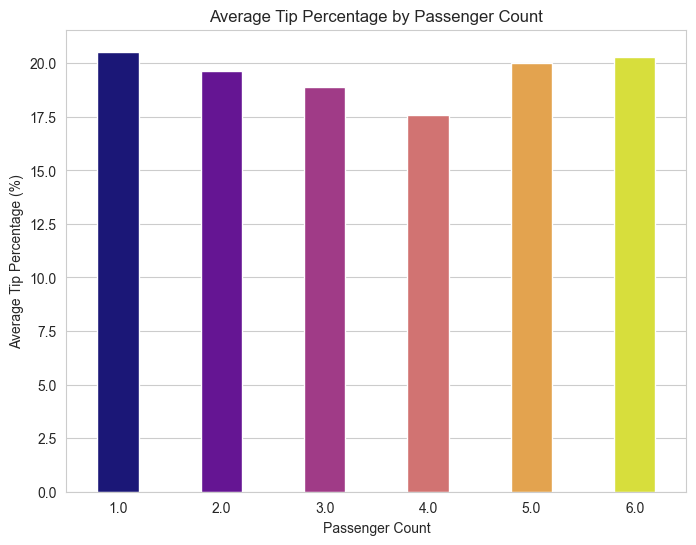

In [161]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Calculate the average tip percentage by passenger count
avg_tip_by_passenger_count = df2.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Plot the average tip percentage by passenger count
plt.figure(figsize=(8, 6))
sns.barplot(x="passenger_count", y="tip_percentage", data=avg_tip_by_passenger_count, palette="plasma", width = .4,hue="passenger_count",legend=False)
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Passenger Count')
plt.xticks(rotation=0)
plt.show()


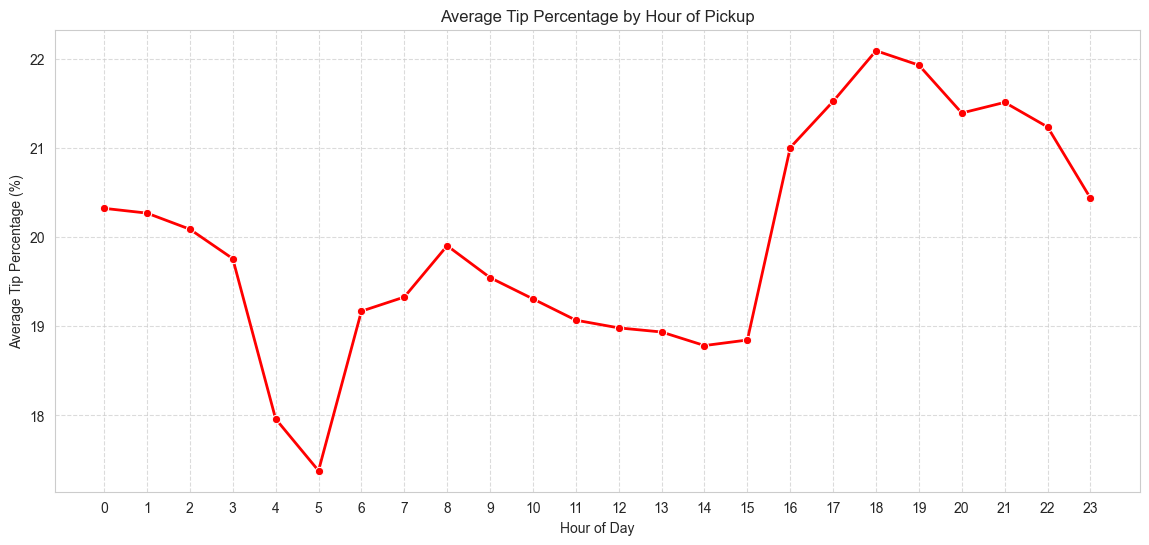

In [162]:
# Calculate the average tip percentage by hour of pickup
avg_tip_by_hour = df2.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

# Plot the average tip percentage by hour of the day
plt.figure(figsize=(14, 6))
sns.lineplot(data=avg_tip_by_hour, x="pickup_hour", y="tip_percentage", marker="o", color="red", linewidth=2)
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage (%)')
plt.title('Average Tip Percentage by Hour of Pickup')
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [163]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Categorize trips into Low and High Tip groups
df2['tip_category'] = np.where(
    df2['tip_percentage'] < 10, 'Low Tip',
    np.where(df2['tip_percentage'] > 25, 'High Tip', 'Medium Tip')
)

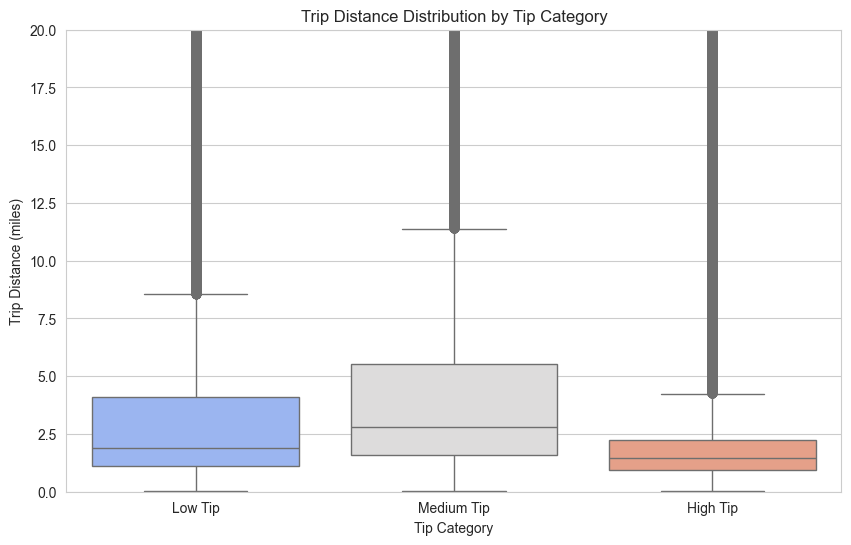

In [164]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tip_category', y='trip_distance', data=df2, palette='coolwarm',hue='tip_category',legend=False)
plt.xlabel("Tip Category")
plt.ylabel("Trip Distance (miles)")
plt.title("Trip Distance Distribution by Tip Category")
plt.ylim(0, 20)  # Focus on relevant range
plt.show()

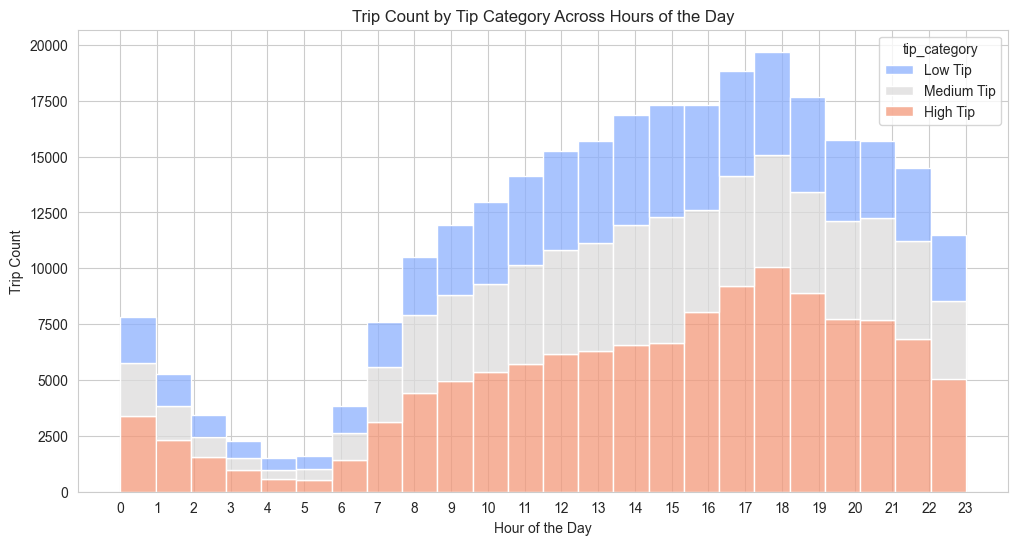

In [165]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df2, x='pickup_hour', hue='tip_category', multiple='stack', bins=24, palette='coolwarm')
plt.xlabel("Hour of the Day")
plt.ylabel("Trip Count")
plt.title("Trip Count by Tip Category Across Hours of the Day")
plt.xticks(range(0, 24))
plt.show()

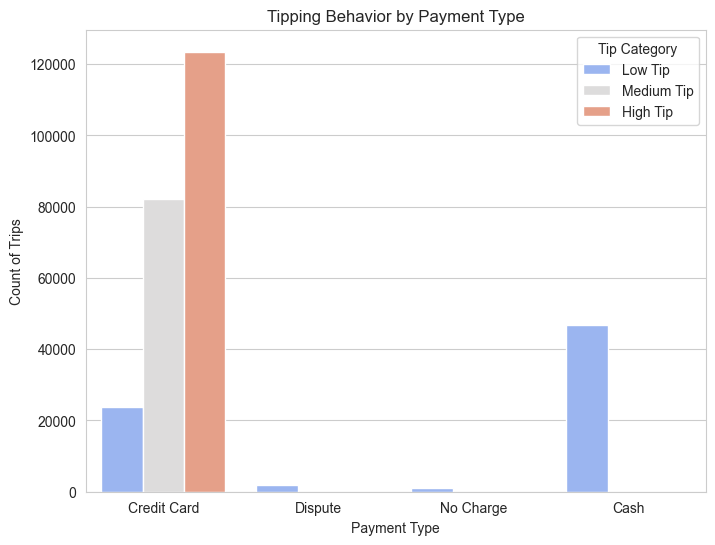

In [166]:
plt.figure(figsize=(8, 6))
sns.countplot(x="payment_type", hue="tip_category", data=df2, palette="coolwarm")
plt.xlabel("Payment Type")
plt.ylabel("Count of Trips")
plt.title("Tipping Behavior by Payment Type")
plt.legend(title="Tip Category")
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

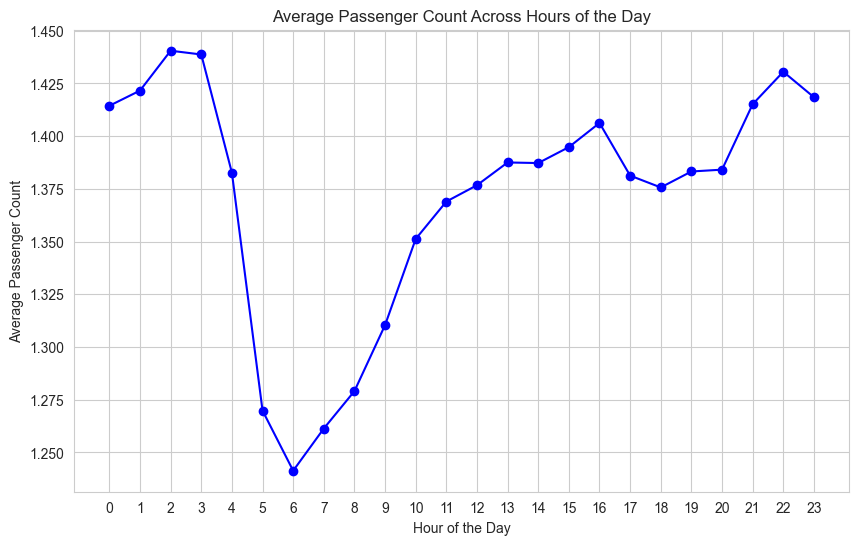

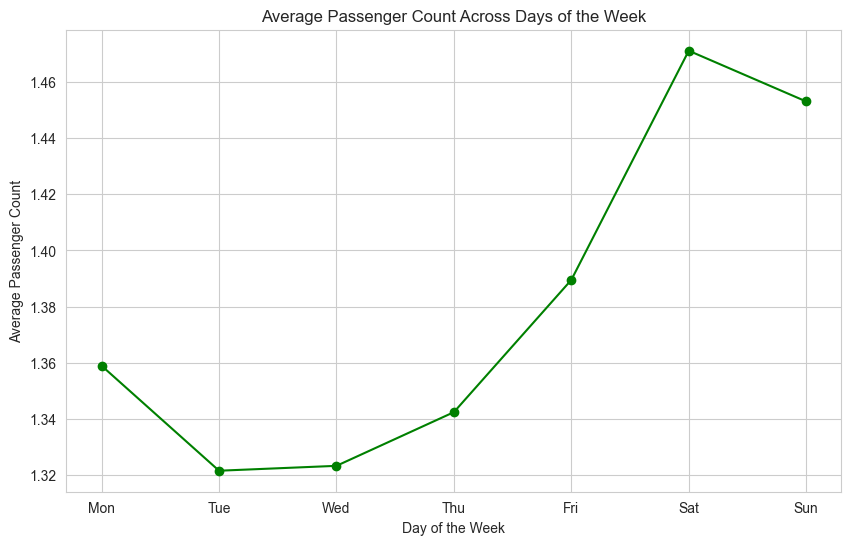

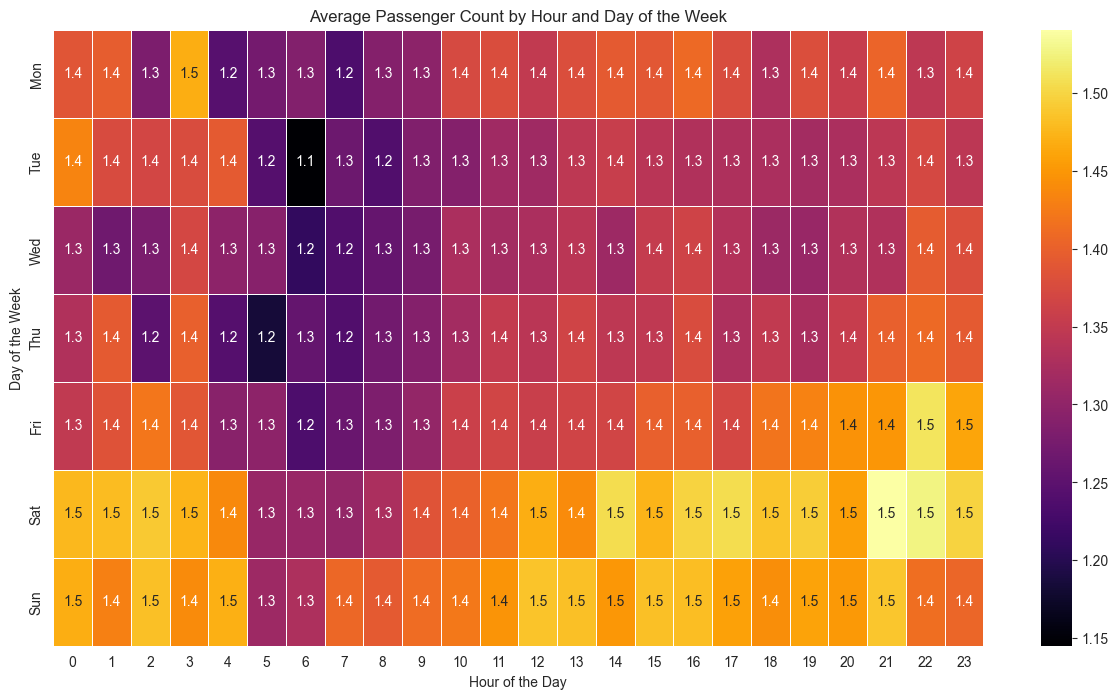

In [167]:
# See how passenger count varies across hours and days
# Group by hour of the day and calculate average passenger count
avg_passenger_by_hour = df2.groupby('pickup_hour')['passenger_count'].mean()

# Group by day of the week and calculate average passenger count
avg_passenger_by_day = df2.groupby('pickup_day')['passenger_count'].mean()

passenger_heatmap = df2.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().unstack()

# Plot the variation of passenger count across hours of the day
plt.figure(figsize=(10, 6))
plt.plot(avg_passenger_by_hour.index, avg_passenger_by_hour.values, marker='o', color='b')
plt.title('Average Passenger Count Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 24))  # Set x-ticks to represent hours of the day (0-23)
plt.grid(True)
plt.show()

# Plot the variation of passenger count across days of the week
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(10, 6))
plt.plot(avg_passenger_by_day.index, avg_passenger_by_day.values, marker='o', color='g')
plt.title('Average Passenger Count Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 7), days_of_week)  # Set x-ticks to represent days of the week
plt.grid(True)
plt.show()

#Heatmap - Passenger Count by Hour & Day
plt.figure(figsize=(15, 8))
sns.heatmap(passenger_heatmap, cmap="inferno", annot=True, fmt=".1f", linewidths=0.5, xticklabels=range(0, 24), yticklabels=days_of_week)
plt.title("Average Passenger Count by Hour and Day of the Week")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

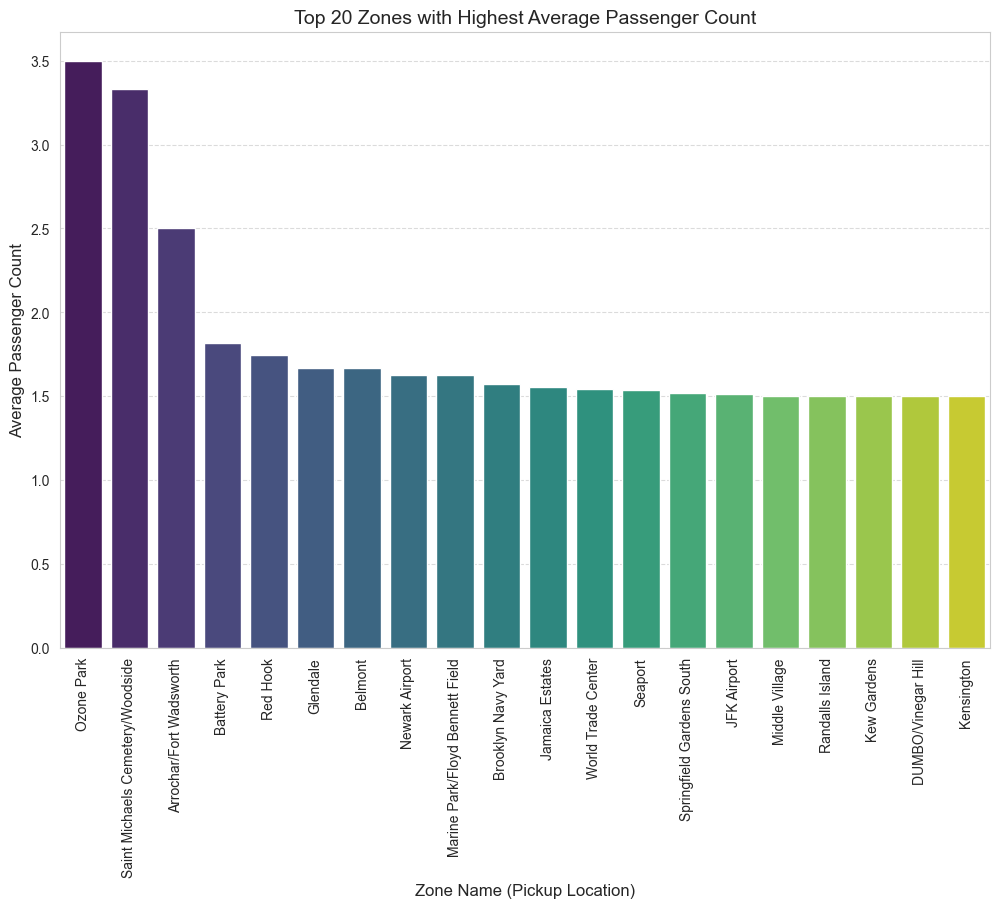

In [168]:
# How does passenger count vary across zones
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_by_zone = df2.groupby('zone')['passenger_count'].mean()

# Sort in descending order for better visualization
avg_passenger_by_zone_sorted = avg_passenger_by_zone.sort_values(ascending=False).reset_index()

# **Plot top 20 zones with highest average passenger count**
plt.figure(figsize=(12, 8))
sns.barplot(x="zone", y="passenger_count", data=avg_passenger_by_zone_sorted.head(20), palette="viridis",hue="zone",legend=False)

# Formatting
plt.title("Top 20 Zones with Highest Average Passenger Count", fontsize=14)
plt.xlabel("Zone Name (Pickup Location)", fontsize=12)
plt.ylabel("Average Passenger Count", fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


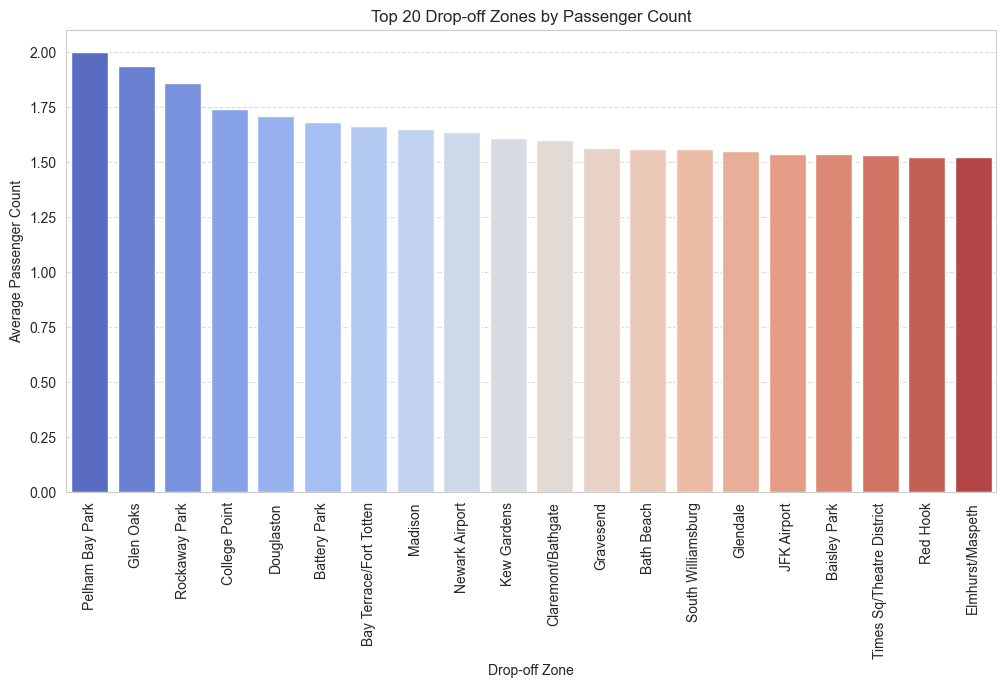

In [175]:
# Create a mapping of LocationID to Zone Name
location_to_zone = df2[['LocationID', 'zone']].drop_duplicates()

# Merge drop-off location names into the dataset
df2 = df2.merge(location_to_zone, left_on="DOLocationID", right_on="LocationID", how="left", suffixes=("", "_dropoff"))
# Group by Drop-off Zone Name instead of ID
avg_passenger_by_dropoff = df2.groupby("zone_dropoff")["passenger_count"].mean().reset_index()

# Sort in descending order
avg_passenger_by_dropoff_sorted = avg_passenger_by_dropoff.sort_values(by="passenger_count", ascending=False)

# Plot top 20 drop-off zones
plt.figure(figsize=(12, 6))
sns.barplot(x="zone_dropoff", y="passenger_count", data=avg_passenger_by_dropoff_sorted.head(20), palette="coolwarm",hue="zone_dropoff",legend=False)
plt.xlabel("Drop-off Zone")
plt.ylabel("Average Passenger Count")
plt.title("Top 20 Drop-off Zones by Passenger Count")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

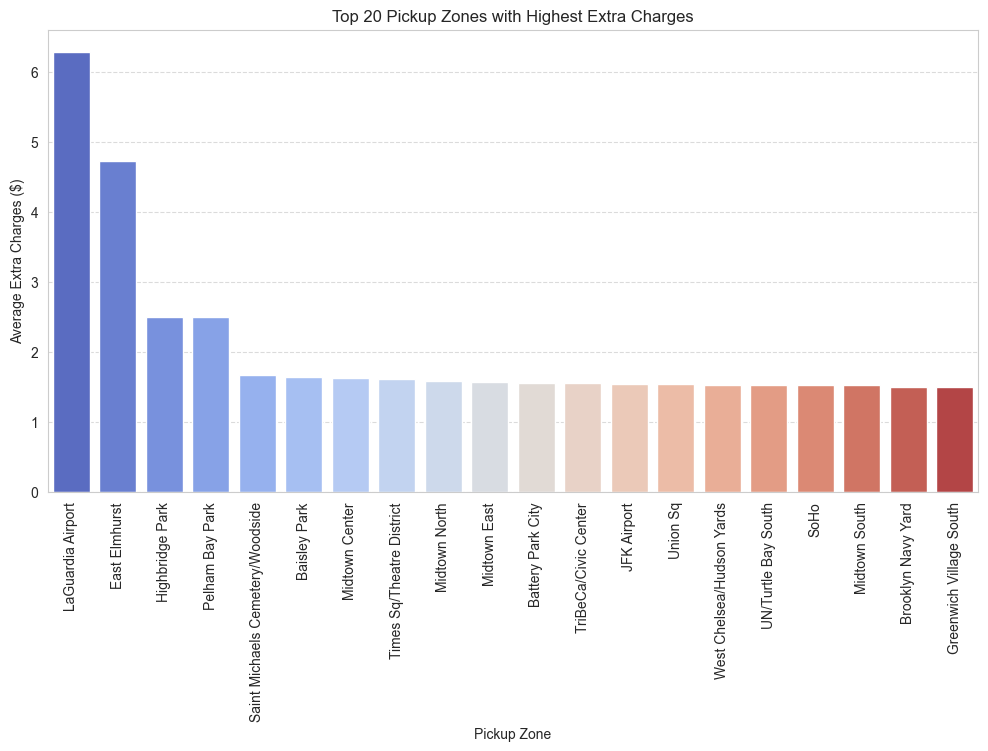

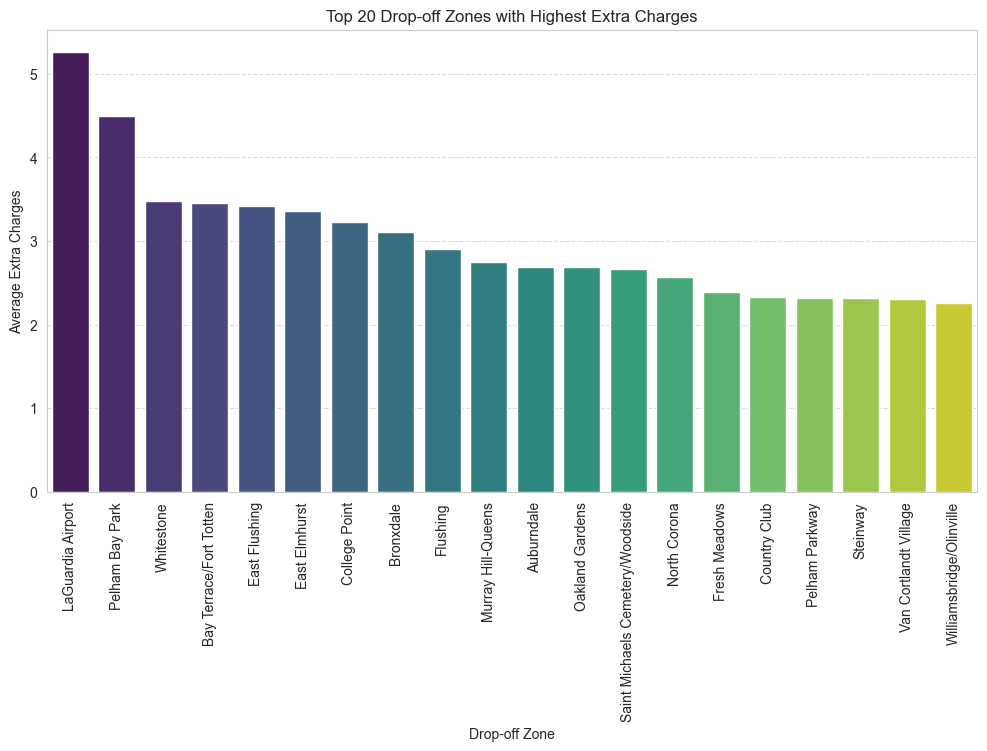

In [176]:
# How often is each surcharge applied?

# Calculate total extra charges per pickup zone
extra_by_pickup = df2.groupby("zone")["extra"].mean().reset_index()

# Sort in descending order
extra_by_pickup_sorted = extra_by_pickup.sort_values(by="extra", ascending=False)

# Plot top 20 zones with highest extra charges
plt.figure(figsize=(12, 6))
sns.barplot(x="zone", y="extra", data=extra_by_pickup_sorted.head(20), palette="coolwarm",hue="zone",legend=False)
plt.xlabel("Pickup Zone")
plt.ylabel("Average Extra Charges ($)")
plt.title("Top 20 Pickup Zones with Highest Extra Charges")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Repeat for drop-off zones
extra_by_dropoff = df2.groupby("zone_dropoff")["extra"].mean().reset_index()
extra_by_dropoff_sorted = extra_by_dropoff.sort_values(by="extra", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="zone_dropoff", y="extra", data=extra_by_dropoff_sorted.head(20), palette="viridis",hue="zone_dropoff",legend=False)
plt.xlabel("Drop-off Zone")
plt.ylabel("Average Extra Charges")
plt.title("Top 20 Drop-off Zones with Highest Extra Charges")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

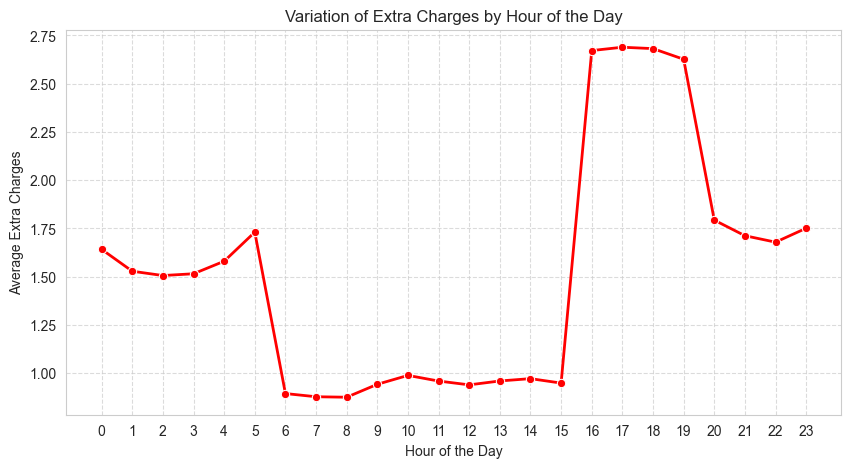

In [177]:
# Group by hour of the day and calculate average extra charges
extra_by_hour = df2.groupby("pickup_hour")["extra"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=extra_by_hour, x="pickup_hour", y="extra", marker="o", color="r", linewidth=2)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Extra Charges")
plt.title("Variation of Extra Charges by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### **Optimized Recommendations for Routing & Dispatching**  

**Improve Dispatch Efficiency:**  
   - Increase vehicle availability in **high-demand zones** during peak hours (**7 AM - 9 AM, 4 PM - 7 PM**).  
   - Prioritize **airports & residential areas** at night (**11 PM - 5 AM**) to match demand.  
   - Use **alternative routes** to avoid traffic bottlenecks and reduce delays.  

**Optimize Pricing & Surcharges:**  
   - Implement **dynamic pricing** based on peak hours and high-traffic zones.  
   - Ensure **transparent surcharge communication** to customers before booking.  

**Enhance Customer Experience:**  
   - **Encourage tipping** with incentives for **off-peak travel** and high-rated drivers.  
   - Provide **personalized service** during busy hours.  

**Manage Passenger Capacity:**  
   - Deploy **larger vehicles** during peak hours and special events to accommodate more passengers.  
   - Use **historical demand data** to balance supply and avoid long wait times.  

These optimizations will **enhance efficiency, maximize revenue, and improve customer satisfaction**. 

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### ** Optimized Strategic Positioning of Cabs Based on Trip Trends**  

**Deploy Cabs in High-Demand Zones:**  
   - **Peak Hours (7 AM - 9 AM, 4 PM - 7 PM):** Position cabs near **business districts, train stations, and airports** to meet rush-hour demand.  
   - **Nighttime Demand (11 PM - 5 AM):** Prioritize **airports, nightlife districts, and residential areas** for late-night pickups.  

**Adjust Fleet Based on Weekday vs. Weekend Trends:**  
   - **Weekdays:** Focus on **office zones in the morning** and **residential areas in the evening**.  
   - **Weekends:** Shift cabs to **shopping malls, nightlife areas, and entertainment hubs** from the evening onward.  
 
**Revenue & Surcharge Optimization:**  
   - **High-Fare Areas:** Prioritize high-revenue zones like **airports and central business districts** during peak hours.  

**Optimize Driver Work Schedules:**  
   - **Maximize availability during peak hours** while reducing idle time during slow periods.  

**Manage Traffic Bottlenecks Effectively:**  
   - **Avoid highly congested areas during peak hours** unless necessary.  

  
By positioning cabs in **high-demand zones, adjusting based on time trends, and optimizing for efficiency**, taxi operations can **reduce wait times, increase profitability, and improve customer satisfaction**. that the cabs are operating on efficient

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### ** Optimized Data-Driven Pricing Strategy**  

 **Dynamic Pricing Based on Demand & Time:**  
   - **Peak Hours (7-9 AM, 4-7 PM):** Increase fares **1.5x-2x** in high-demand areas (business hubs, transit stations).  
   - **Nighttime (11 PM-5 AM):** Lower base fares but apply **higher surge pricing** in entertainment & airport zones.  

 **Distance-Based Fare Adjustments:**  
   - **Short trips (0-2 miles):** Keep fares low to attract customers.  
   - **Medium trips (2-5 miles):** Slightly higher rate per mile.  
   - **Long trips (>5 miles):** **Premium pricing** for airport & long-distance travel.  

 **Passenger-Based Pricing:**  
   - No extra charge for **1-2 passengers**.  
   - Apply a **$5 group surcharge** for **3+ passengers**.  

 **Incentivizing Off-Peak Travel:**  
   - Offer **10-20% fare discounts** for trips between **10 AM-4 PM & late-night hours**.  

 **Revenue from Surcharges:**  
   - **Traffic congestion surcharge** for high-density areas.  
   - **airport surcharges ($10)**.  

 **Tipping Optimization:**  
   - Encourage higher tipping.  

 **Weather & Seasonal Pricing:**  
   - Apply **1.2x surge pricing** during **rain, snow, or extreme weather**.  


By implementing **data-driven fare adjustments**, this strategy will **increase revenue, optimize supply, and enhance customer experience**.  and introducing flexibility for customers in terms of fare booking can help build a loyal customer base while maximizing overall revenue.